# Libraries

In [1]:
# Import libraries
import pandas as pd
from sklearn.utils.validation import check_X_y, check_array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import warnings
warnings.filterwarnings("ignore")  
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from mlxtend.feature_selection import SequentialFeatureSelector
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
import time
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import RocCurveDisplay , PrecisionRecallDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score
from sklearn.svm import SVC
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from scipy.special import expit
from sklearn.model_selection import cross_val_score
from collections import Counter
from urllib.error import HTTPError, URLError

# Importing Dataset

In [2]:
# Option 1: Google Drive
url = "https://drive.google.com/uc?export=download&id=13IPrP5WZWYBUKwVAEVApXH4I2-37c1zH"
df = pd.read_csv(url, header=0, sep=',')

In [3]:
# Option 2: UCI Machine Learning Repository
# If the one above does not work use this 
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
#df = pd.read_excel(url, header=1, engine='xlrd')

In [4]:
#df.to_csv("default_of_credit_card_clients.csv", index=False)
#print("CSV file saved as 'default_of_credit_card_clients.csv'")

# EDA

## Data Exploration

In [5]:
# Check the first few rows of the dataframe
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#Check the size of the data
print(f'The dataset has {df.shape[0]} records and {df.shape[1]} columns')

The dataset has 30000 records and 25 columns


In [7]:
#Check the data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
#Check null values in the data
print(f'The data set has the following null values per column \n{df.isnull().sum()}' )

The data set has the following null values per column 
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [9]:
#Check duplicate values in data
print(f'The data set has {df.duplicated().sum()} duplicated values')

The data set has 0 duplicated values


In [10]:
#Check the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Our data exploration revealed that the dataset contains no duplicate values or missing (null) entries. Additionally, all variables consist exclusively of numerical data types, represented as either floats or integers.

## Target Column

Since 'Default Payment' is our target variable, we first examine its distribution to assess potential class imbalance, which will inform our modeling strategy.

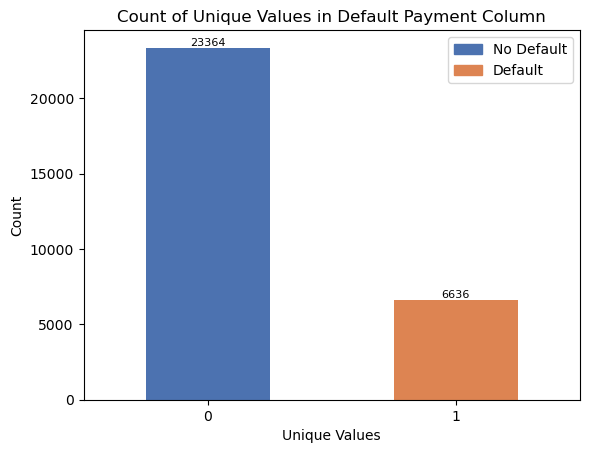

In [11]:
value_counts = df['default payment next month'].value_counts().sort_index()
num_colors = len(value_counts)
colors = sns.color_palette('deep')
for i, count in enumerate(value_counts):
    plt.text(i, count, str(count), ha='center', va='bottom', fontsize=8)
legend_labels = { 0: 'No Default',1: 'Default',}
legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
plt.legend(legend_handles, [legend_labels[value] for value in value_counts.index], loc='upper right')
value_counts.plot(kind='bar', color=colors)
plt.title('Count of Unique Values in Default Payment Column')
plt.xlabel('Unique Values')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

The bar chart illustrates a significant class imbalance in our target variable, "Default Payment." The dataset contains 23,364 instances of "No Default" compared to only 6,636 cases of "Default," indicating that non-defaulting clients dominate the data (approximately 78% vs. 22%). This imbalance may bias machine learning models toward predicting the majority class, leading to poor generalization for default cases. To mitigate this issue, we will employ balancing techniques such as SMOTE (Synthetic Minority Oversampling), class weighting, or undersampling during model training. These adjustments will ensure equitable learning from both classes and improve predictive accuracy for the critical minority class (defaults).

## ID Column

We remove the 'ID' column because as unique identifiers provide no predictive signal and could artificially inflate model performance metrics during training. Subsequent analysis will focus on financially relevant features.

In [12]:
df.drop(columns=['ID'], inplace=True)

## Categorical Features

Our dataset contains several categorical variables that capture essential demographic and behavioral characteristics of credit card holders. These include gender (SEX), education level (EDUCATION), marital status (MARRIAGE), and payment history (PAY_0 to PAY_6). While numerically encoded, these variables represent discrete groups or ordered categories rather than continuous values. Understanding their distributions and relationships with the target variable (default payment next month) is critical, as:

- Demographics (e.g., EDUCATION, MARRIAGE) may reveal risk segments,

- Payment behaviors (PAY_0-PAY_6) directly reflect creditworthiness patterns.


We analyze these features using frequency distributions and stratified visualizations to identify potential biases or predictive signals for downstream modeling.

### Gender

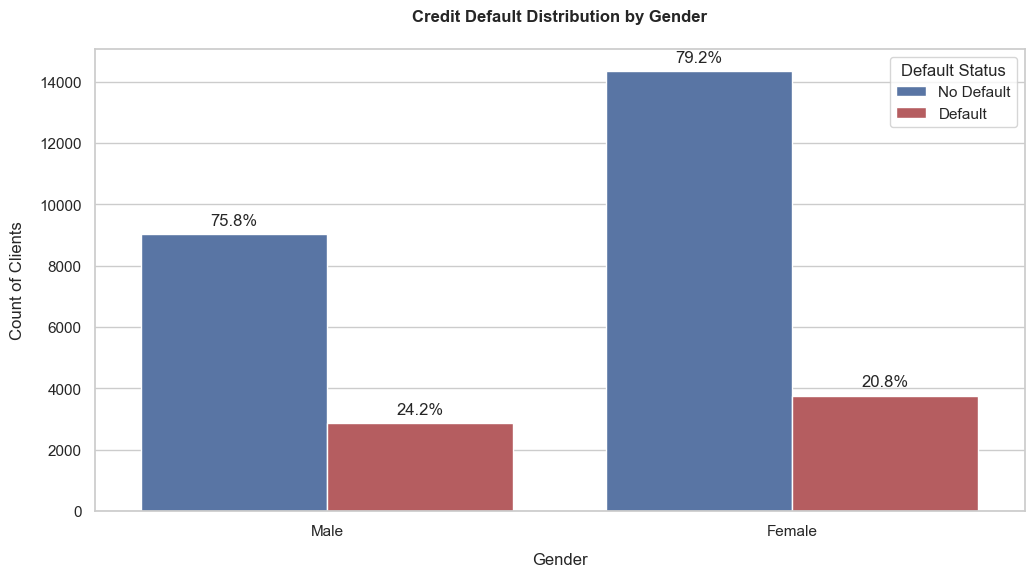

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='SEX', hue='default payment next month', data=df, 
                   palette={0: "#4c72b0", 1: "#c44e52"})
plt.title('Credit Default Distribution by Gender', pad=20, fontweight='bold')
plt.xlabel('Gender', labelpad=10)
plt.ylabel('Count of Clients', labelpad=10)
plt.legend(title='Default Status', labels=['No Default', 'Default'])
ax.xaxis.set_major_formatter(plt.FixedFormatter(['Male', 'Female']))
total_counts = df['SEX'].value_counts().sort_index()
for i, bar_group in enumerate(ax.containers):
    for j, bar in enumerate(bar_group):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 200,
                f'{height/total_counts[j+1]:.1%}',
                ha='center', va='bottom')
plt.show()

The bar chart reveals distinct default patterns between genders, showing that while female clients comprise a larger portion of the dataset (79.2% non-default vs. 20.8% default), male clients exhibit a higher relative default rate (24.2% vs. females' 20.8%). This 3.4 percentage-point difference suggests gender may influence repayment behavior, though further statistical testing is needed to confirm significance. The visualization highlights the importance of considering gender demographics in credit risk modeling, particularly given the dataset's female-dominated sample composition.

### Education Level

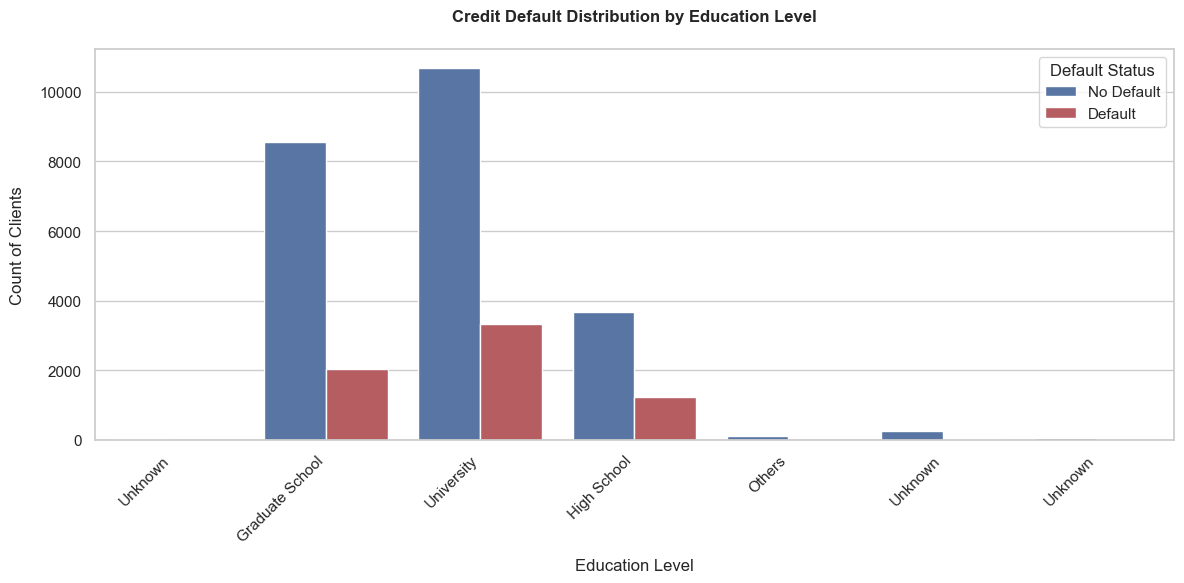

In [14]:
sns.set(style="whitegrid")
education_labels = {
    0: "Unknown",
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Others",
    5: "Unknown",
    6: "Unknown"

}

plt.figure(figsize=(12, 6))

edu_order = sorted(df['EDUCATION'].unique())
ax = sns.countplot(x='EDUCATION', 
                   hue='default payment next month', 
                   data=df,
                   palette={0: "#4c72b0", 1: "#c44e52"},
                   order=edu_order)

plt.title('Credit Default Distribution by Education Level', 
          pad=20, 
          fontweight='bold')
plt.xlabel('Education Level', labelpad=10)
plt.ylabel('Count of Clients', labelpad=10)
plt.legend(title='Default Status', 
           labels=['No Default', 'Default'])

ax.set_xticklabels([education_labels.get(x, str(x)) for x in edu_order])
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The visualization reveals several data quality considerations in our education categories:
- "Unknown" appears twice (likely from codes 5 and 6 in the raw data)
- "Others" represents a category with undefined education levels

Because of that we will merge these ambiguous categories

In [15]:
df['EDUCATION'] = df['EDUCATION'].replace({5:4, 6:4, 0:4})

In [16]:
education_labels = {
    1: "Graduate School",
    2: "University",
    3: "High School",
    4: "Other/Unknown" }

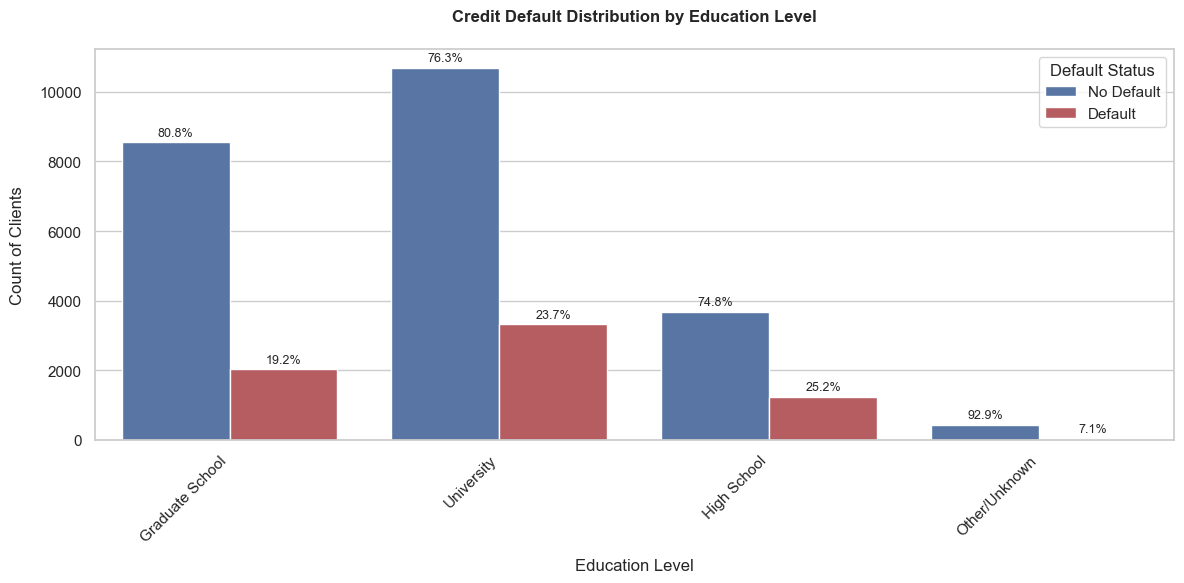

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))


edu_order = [1, 2, 3, 4]  
ax = sns.countplot(x='EDUCATION', 
                   hue='default payment next month', 
                   data=df,
                   palette={0: "#4c72b0", 1: "#c44e52"},
                   order=edu_order)

plt.title('Credit Default Distribution by Education Level', 
          pad=20, 
          fontweight='bold')
plt.xlabel('Education Level', labelpad=10)
plt.ylabel('Count of Clients', labelpad=10)
plt.legend(title='Default Status', 
           labels=['No Default', 'Default'])
ax.set_xticklabels([education_labels[x] for x in edu_order])
plt.xticks(rotation=45, ha='right')

cross_tab = pd.crosstab(df['EDUCATION'], df['default payment next month']).loc[edu_order]

for i, edu in enumerate(edu_order):
    for j, status in enumerate([0, 1]): 
        count = cross_tab.loc[edu, status]
        total = cross_tab.loc[edu].sum()
        percentage = 100 * count / total
        bar = ax.containers[j][i]
        ax.text(bar.get_x() + bar.get_width()/2, 
                bar.get_height() + 100,
                f'{percentage:.1f}%',
                ha='center', 
                va='bottom',
                fontsize=9)

plt.tight_layout()
plt.show()

The visualization reveals two key patterns: First, Graduate School clients exhibit the lowest default rate at 19.2%, consistent with the general correlation between advanced education and greater income stability. Second, the dataset demonstrates a pronounced concentration of University-educated clients (representing 46.7% of the total sample), significantly outnumbering other education categories.

### Marriage

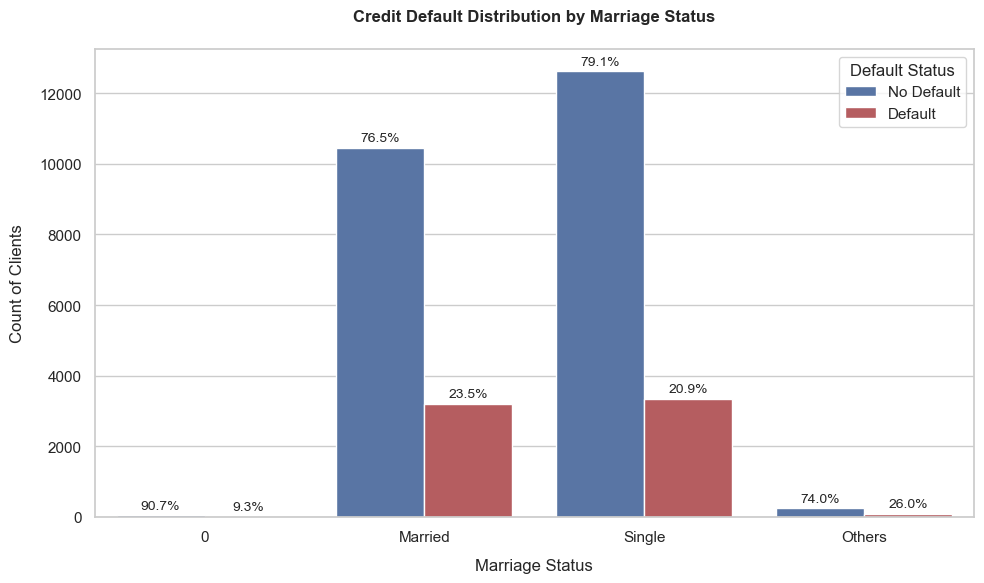

In [18]:
sns.set(style="whitegrid")
marriage_labels = {
    1: "Married",
    2: "Single", 
    3: "Others"
}
plt.figure(figsize=(10, 6))
marriage_order = sorted(df['MARRIAGE'].unique())
ax = sns.countplot(x='MARRIAGE',
                  hue='default payment next month',
                  data=df,
                  palette={0: "#4c72b0", 1: "#c44e52"},
                  order=marriage_order)
plt.title('Credit Default Distribution by Marriage Status', pad=20, fontweight='bold')
plt.xlabel('Marriage Status', labelpad=10)
plt.ylabel('Count of Clients', labelpad=10)
plt.legend(title='Default Status', labels=['No Default', 'Default'])
ax.set_xticklabels([marriage_labels.get(x, str(x)) for x in marriage_order])
cross_tab = pd.crosstab(df['MARRIAGE'], df['default payment next month']).loc[marriage_order]
for i, marriage_code in enumerate(marriage_order):
    for j, default_status in enumerate([0, 1]):  
        count = cross_tab.loc[marriage_code, default_status]
        total = cross_tab.loc[marriage_code].sum()
        percentage = 100 * count / total
        bar = ax.containers[j][i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_height() + 100,
                    f'{percentage:.1f}%',
                    ha='center',
                    va='bottom',
                    fontsize=10)
plt.tight_layout()
plt.show()

The visualization reveals two key insights:
- Single clients constitute the largest demographic group
- Despite varying population sizes, default rates show remarkable consistency across marital statuses

This <5% differential suggests marital status alone may not be a strong predictor of credit risk in this portfolio

In [19]:
df['MARRIAGE'] = df['MARRIAGE'].replace({0:3})

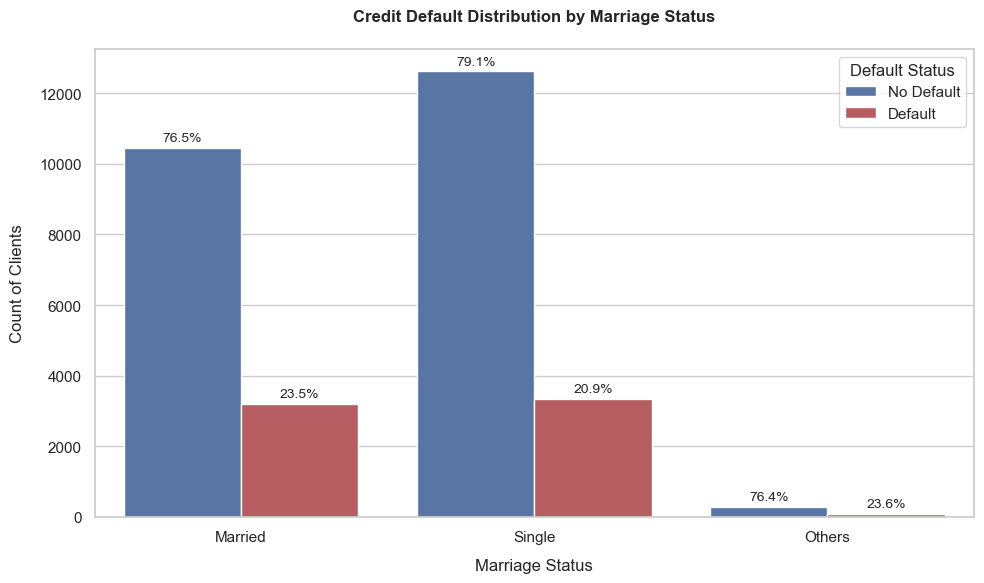

In [20]:
plt.figure(figsize=(10, 6))
marriage_order = sorted(df['MARRIAGE'].unique())
ax = sns.countplot(x='MARRIAGE',
                  hue='default payment next month',
                  data=df,
                  palette={0: "#4c72b0", 1: "#c44e52"},
                  order=marriage_order)
plt.title('Credit Default Distribution by Marriage Status', pad=20, fontweight='bold')
plt.xlabel('Marriage Status', labelpad=10)
plt.ylabel('Count of Clients', labelpad=10)
plt.legend(title='Default Status', labels=['No Default', 'Default'])
ax.set_xticklabels([marriage_labels.get(x, str(x)) for x in marriage_order])
cross_tab = pd.crosstab(df['MARRIAGE'], df['default payment next month']).loc[marriage_order]
for i, marriage_code in enumerate(marriage_order):
    for j, default_status in enumerate([0, 1]):  
        count = cross_tab.loc[marriage_code, default_status]
        total = cross_tab.loc[marriage_code].sum()
        percentage = 100 * count / total
        bar = ax.containers[j][i]
        if count > 0:
            ax.text(bar.get_x() + bar.get_width()/2,
                    bar.get_height() + 100,
                    f'{percentage:.1f}%',
                    ha='center',
                    va='bottom',
                    fontsize=10)
plt.tight_layout()
plt.show()

We combined the values of 0 and others, so every record will have the proper categorization

### Repayment Status

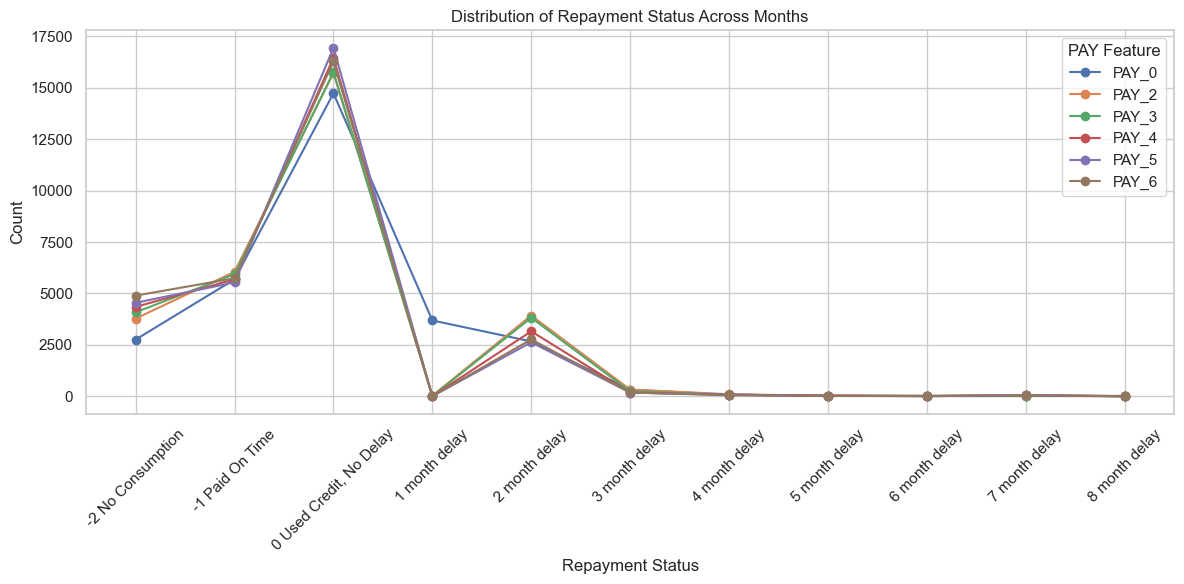

In [21]:
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_status_range = sorted(set(df[pay_cols].values.ravel()))

status_labels = {
    -2: '-2 No Consumption',
    -1: '-1 Paid On Time',
     0: '0 Used Credit, No Delay',
     1: '1 month delay',
     2: '2 month delay',
     3: '3 month delay',
     4: '4 month delay',
     5: '5 month delay',
     6: '6 month delay',
     7: '7 month delay',
     8: '8 month delay',
     9: '9+ month delay'
}

plt.figure(figsize=(12, 6))
for col in pay_cols:
    counts = df[col].value_counts().reindex(pay_status_range, fill_value=0)
    plt.plot(pay_status_range, counts, marker='o', label=col)

plt.title('Distribution of Repayment Status Across Months')
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.legend(title='PAY Feature')
plt.grid(True)

plt.xticks(ticks=pay_status_range, labels=[status_labels.get(x, str(x)) for x in pay_status_range], rotation=45)
plt.tight_layout()
plt.show()

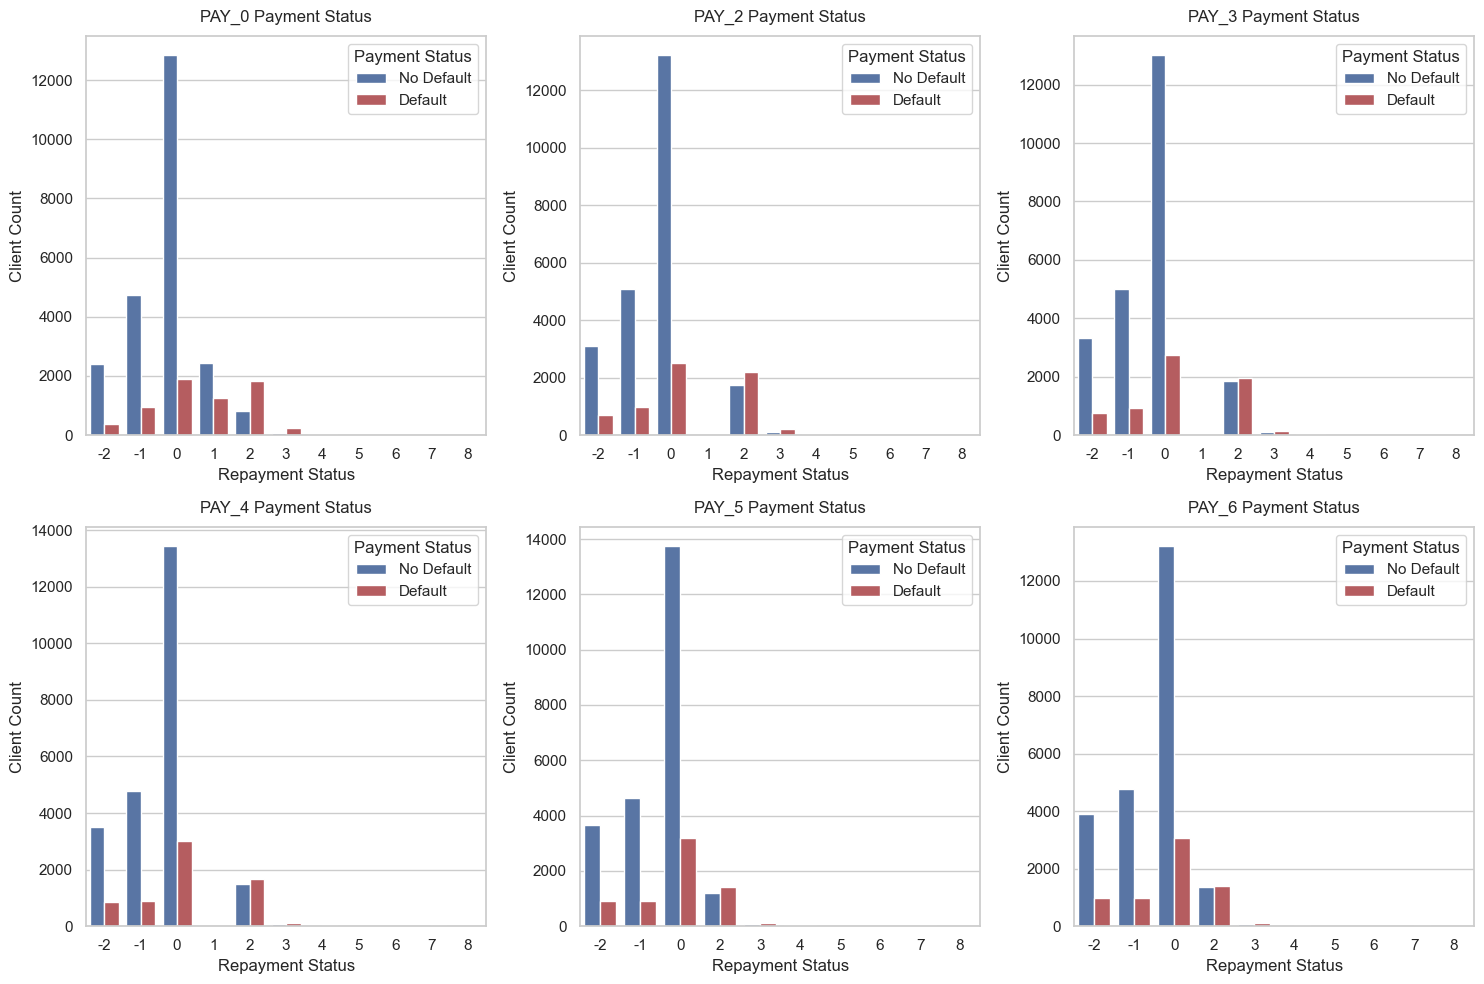

In [22]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(pay_cols, 1):
    plt.subplot(2, 3, i)
    
    # Create stacked countplot
    ax = sns.countplot(x=col, 
                      hue='default payment next month',
                      data=df,
                      palette={0: "#4c72b0", 1: "#c44e52"}, 
                      order=sorted(df[col].unique()))  

    plt.title(f'{col} Payment Status', pad=10)
    plt.xlabel('Repayment Status')
    plt.ylabel('Client Count')
    plt.xticks(rotation=0)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles, ['No Default', 'Default'], title='Payment Status')
    
plt.tight_layout()
plt.show()

These plots analyzes repayment behavior using standardized status codes:

- 2: No credit card usage
- 1: Paid duly (on time)
- 0: Used credit but paid minimum due
- 1-9: Months delayed (e.g., 2 = 2-month delay)

The data reveals a clear behavioral pattern:

- Strong On-Time Payment Culture
- Most clients cluster in status -1 (Paid On Time) and 0 (Used Credit/No Delay), indicating widespread compliance with minimum payments.

Default Risk Escalation

- Delays of ≥1 month (status 1+) show exponentially increasing default rates


## Numerical Features

Our dataset includes continuous and discrete numerical variables that capture critical financial behaviors and client attributes. These features—such as credit limit (LIMIT_BAL), billing amounts (BILL_AMT1-6), payment amounts (PAY_AMT1-6), and client age (AGE)—represent measurable quantities with direct financial implications. Understanding their distributions and relationships with default risk is essential.

### Age

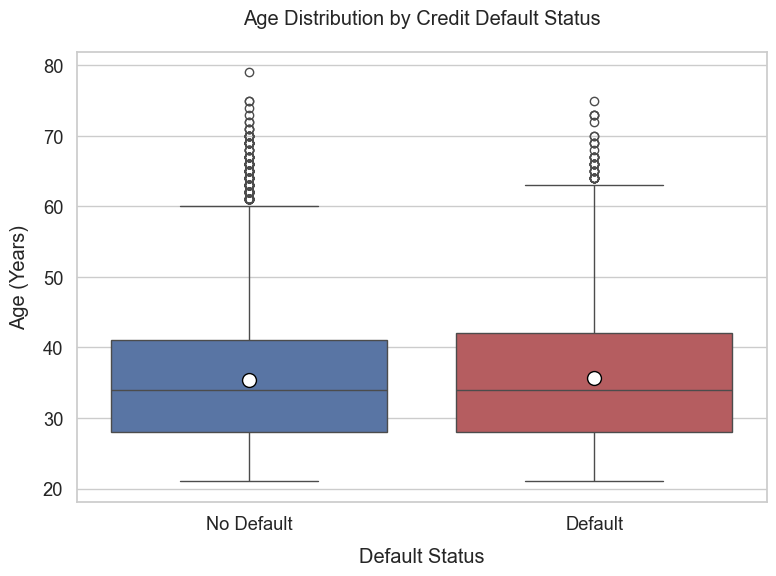

In [23]:
sns.set(style="whitegrid", font_scale=1.2)

plt.figure(figsize=(8, 6))

ax = sns.boxplot(x='default payment next month', 
                 y='AGE',
                 data=df,
                 palette={'0': "#4c72b0", '1': "#c44e52"}, 
                 showmeans=True,
                 meanprops={"marker":"o", 
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":10})  
plt.title('Age Distribution by Credit Default Status', pad=20)
plt.xlabel('Default Status', labelpad=10)
plt.ylabel('Age (Years)', labelpad=10)
plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

From the plot and the table we can see a nearly identical age distributions between defaulters and non-defaulters. Both groups share the same median age (34 years) and first quartile (28 years). While defaulters have a slightly higher mean age (35.7 vs 35.4 years) and third quartile (42 vs 41 years), the 1-year difference in IQR (14 vs 13 years) and matching minimum/maximum ages (21-75/79 years) indicate no meaningful age-based risk pattern. This suggests age is not a significant predictor of default in this dataset.

### Credit Limit

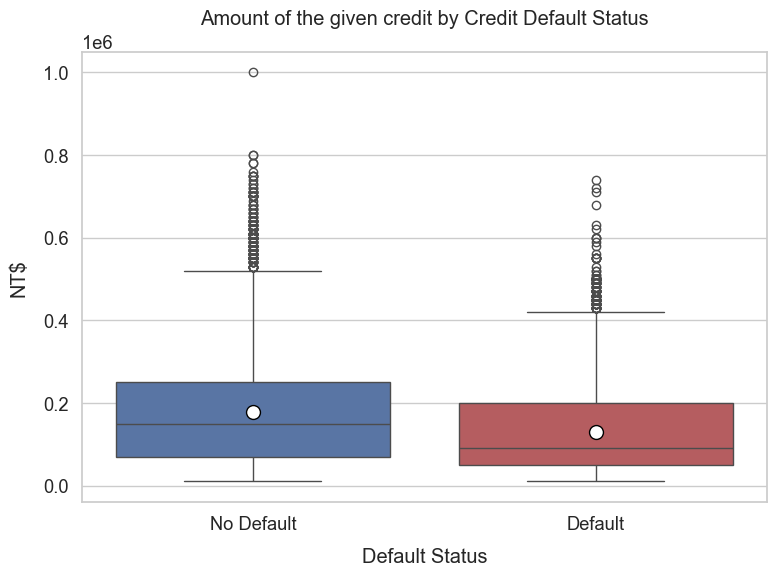

In [24]:
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='default payment next month', 
                 y='LIMIT_BAL',
                 data=df,
                 palette={'0': "#4c72b0", '1': "#c44e52"}, 
                 showmeans=True,
                 meanprops={"marker":"o", 
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":10})  
plt.title('Amount of the given credit by Credit Default Status', pad=20)
plt.xlabel('Default Status', labelpad=10)
plt.ylabel('NT$', labelpad=10)
plt.xticks(ticks=[0, 1], labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

In [25]:
bal_stats = df.groupby('default payment next month')['LIMIT_BAL'].agg([
    ('count', 'count'),
    ('mean', 'mean'),
    ('median', 'median'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q3', lambda x: x.quantile(0.75)),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    ('min', 'min'),
    ('max', 'max')
]).rename(index={'0': 'No Default', '1': 'Default'})
print("Amount of the given credit Statistics:")
display(bal_stats.style.format("{:.1f}"))

Amount of the given credit Statistics:


,count,mean,median,Q1,Q3,IQR,min,max
default payment next month,,,,,,,,
0,23364.0,178099.7,150000.0,70000.0,250000.0,180000.0,10000.0,1000000.0
1,6636.0,130109.7,90000.0,50000.0,200000.0,150000.0,10000.0,740000.0


The data shows clear differences in credit limits between groups:

- Median limit for non-defaulters (¥150K) is 67% higher than defaulters (¥90K)
- Lower credit limits strongly correlate with default risk. 

### History of past payment and Amount of bill statement

We analyze these two categories together since both of them are numerical and we want to understand what is the relationship between them

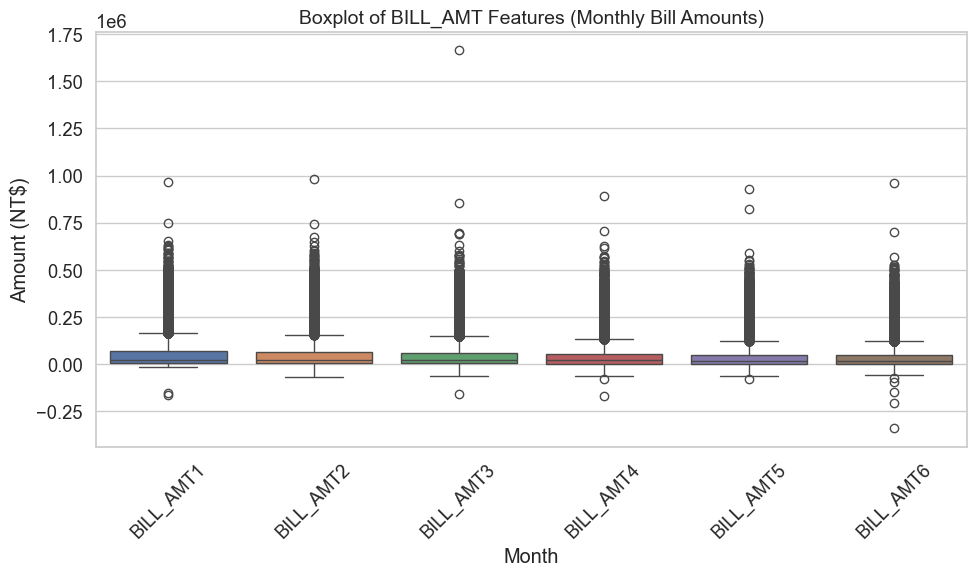

In [26]:
bill_cols = [f'BILL_AMT{i}' for i in range(1, 7)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[bill_cols])
plt.title('Boxplot of BILL_AMT Features (Monthly Bill Amounts)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Amount (NT$)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

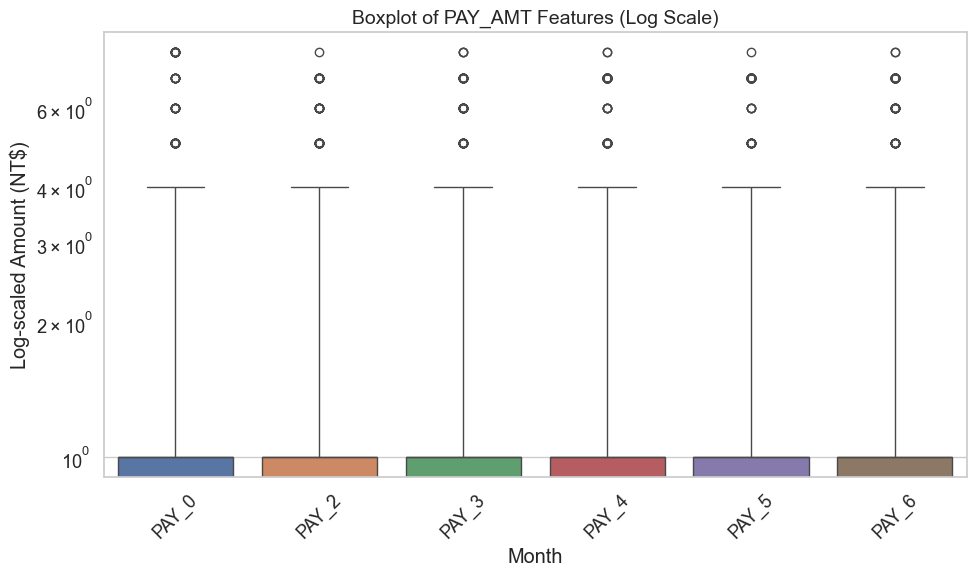

In [27]:
df_log = df[pay_cols].copy()
df_log[df_log == 0] = 1

pay_cols = [f'PAY_AMT{i}' for i in range(1, 7)]

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_log)
plt.yscale('log')
plt.title('Boxplot of PAY_AMT Features (Log Scale)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Log-scaled Amount (NT$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

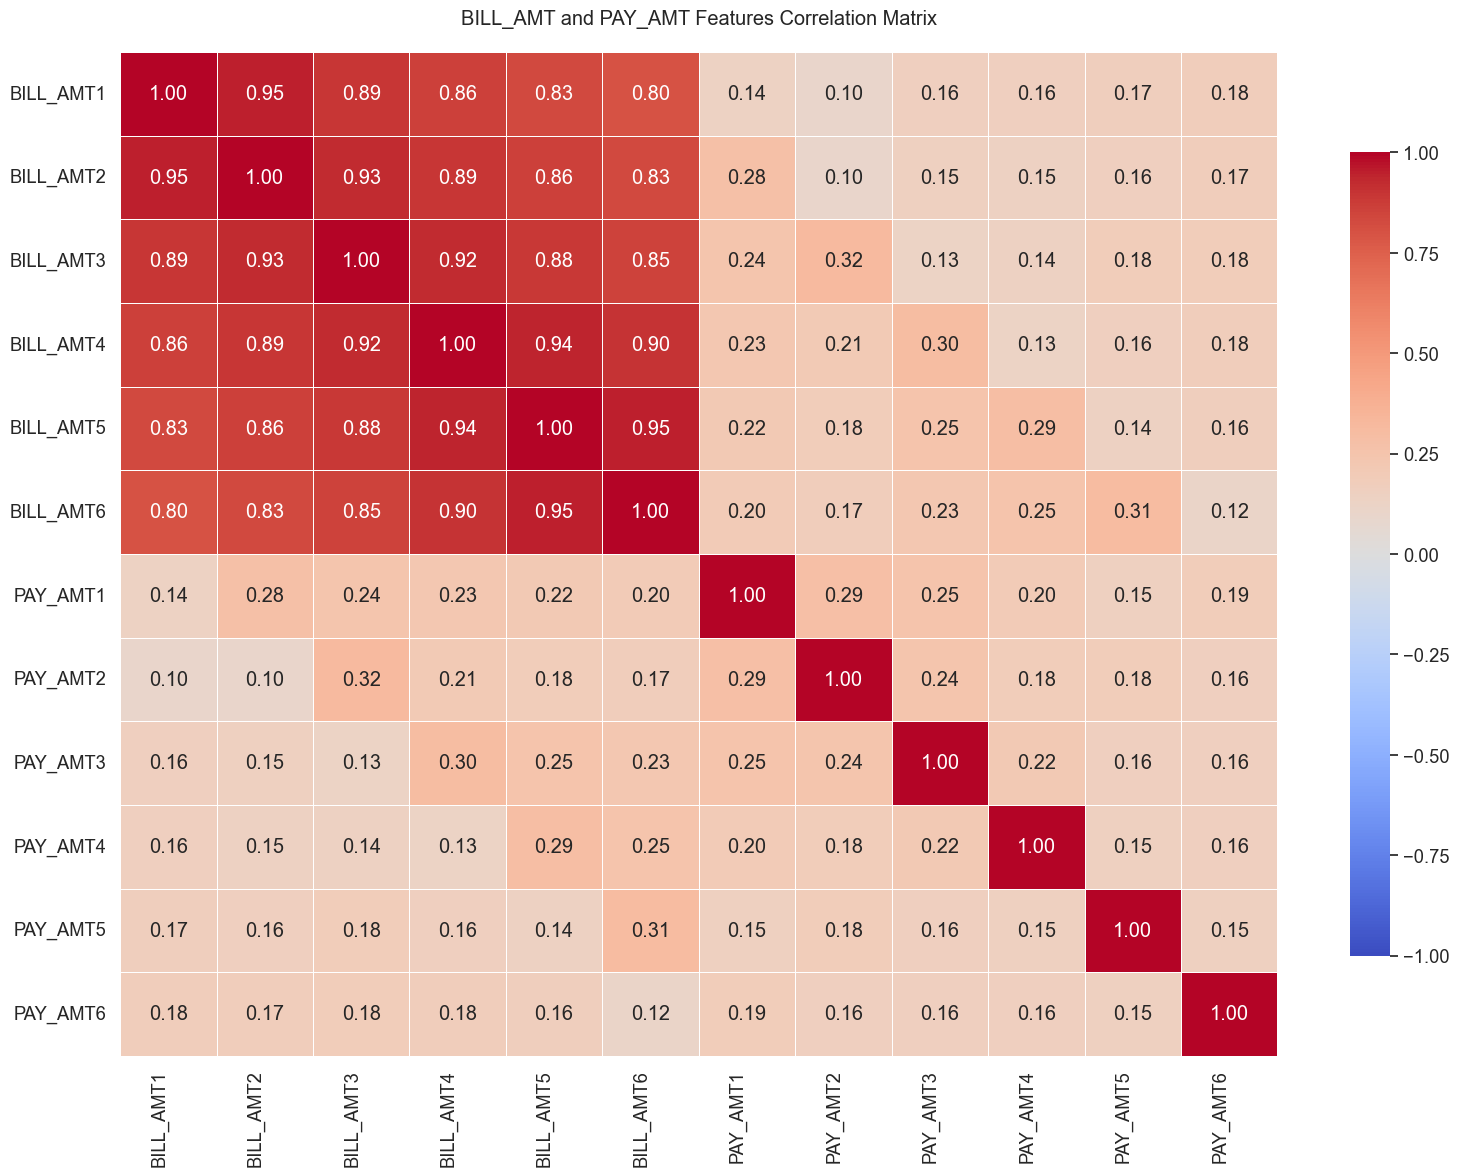

In [28]:
num_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
               'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
               'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
               ]

corr_matrix = df[num_features].corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix,
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1,
            linewidths=0.5,
            cbar_kws={'shrink': 0.8})
plt.title("BILL_AMT and PAY_AMT Features Correlation Matrix", pad=20)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

The correlation matrix reveals extremely high correlations (r > 0.80) among the six BILL_AMT variables, indicating strong multicollinearity. This suggests that the monthly bill amounts across the six months carry highly redundant information. 

# Feature engineering

## Categorical Features

One-hot encoding was applied to categorical variables such as SEX, EDUCATION, and MARRIAGE

In [29]:
df = pd.get_dummies(df, columns=['SEX', 'EDUCATION', 'MARRIAGE'], drop_first=True)

Another crucial part is to have the correct categories for every variable, this was done previously in the EDA where we showed the results with the different plots.

## Numerical Features

### Outliers 

Removing outliers is crucial because extreme values can distort statistical relationships and degrade model performance. In payment data, outliers may represent rare or erroneous transactions that don't reflect typical customer behavior. By eliminating these values before calculating derived features or training models, we ensure more stable, reliable predictions and reduce the influence of noise in our data.

Compute IQR bounds for LIMIT_BAL

In [30]:
original_shape = df.shape
Q1 = df['LIMIT_BAL'].quantile(0.25)
Q3 = df['LIMIT_BAL'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['LIMIT_BAL'] >= lower_bound) & (df['LIMIT_BAL'] <= upper_bound)]
filtered_shape = df.shape

print(f"Rows before filtering: {original_shape[0]}")
print(f"Rows after filtering: {filtered_shape[0]}")
print(f"Rows removed: {original_shape[0] - filtered_shape[0]}")

Rows before filtering: 30000
Rows after filtering: 29833
Rows removed: 167


Compute IQR bounds for BILL_AMT

In [31]:
original_shape = df.shape
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
               'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
mask = pd.Series(True, index=df.index)

for col in bill_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

df = df[mask]

filtered_shape = df.shape

print(f"Rows before filtering: {original_shape[0]}")
print(f"Rows after filtering: {filtered_shape[0]}")
print(f"Rows removed: {original_shape[0] - filtered_shape[0]}")


Rows before filtering: 29833
Rows after filtering: 26112
Rows removed: 3721


Compute IQR bounds for PAY_AMT

In [32]:
original_shape = df.shape
pay_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
mask = pd.Series(True, index=df.index)

for col in pay_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mask &= (df[col] >= lower_bound) & (df[col] <= upper_bound)

df = df[mask]
filtered_shape = df.shape

print(f"Rows before filtering: {original_shape[0]}")
print(f"Rows after filtering: {filtered_shape[0]}")
print(f"Rows removed: {original_shape[0] - filtered_shape[0]}")

Rows before filtering: 26112
Rows after filtering: 18321
Rows removed: 7791


###  Feature Creation

We create custom features that summarize and aggregate the data over time. These new features might provide more insightful information for modeling by capturing patterns and relationships in the data

In [33]:
num_features = ['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
               'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
               'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
               ]

Total Amounts

In [34]:
#Total Amounts
df['total_bill_amt'] = df[[f'BILL_AMT{i}' for i in range(1, 7)]].sum(axis=1)
df['total_pay_amt'] = df[[f'PAY_AMT{i}' for i in range(1, 7)]].sum(axis=1)

Average amounts

In [35]:
#Average Amounts
df['avg_bill_amt'] = df['total_bill_amt'] / 6
df['avg_pay_amt'] = df['total_pay_amt'] / 6

Payment Ratios

In [36]:
#Payment Ratios
df['pay_to_bill_ratio'] = df['total_pay_amt'] / (df['total_bill_amt'] + 1)

Monthly Payment Behavior

In [37]:
# Monthly Payment Behavior
for i in range(1, 7):
    df[f'pay_ratio_{i}'] = df[f'PAY_AMT{i}'] / (df[f'BILL_AMT{i}'] + 1)

Payment Consistency

In [38]:
# Payment Consistency
df['std_pay_amt'] = df[[f'PAY_AMT{i}' for i in range(1, 7)]].std(axis=1)
df['std_bill_amt'] = df[[f'BILL_AMT{i}' for i in range(1, 7)]].std(axis=1)

Mean

In [39]:
df['mean_pay_amt'] = df[[f'PAY_AMT{i}' for i in range(1, 7)]].mean(axis=1)
df['mean_bill_amt'] = df[[f'BILL_AMT{i}' for i in range(1, 7)]].mean(axis=1)


This are the new set of columns that we have

In [40]:
columns_list = df.columns.tolist()
print(columns_list)

['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'total_bill_amt', 'total_pay_amt', 'avg_bill_amt', 'avg_pay_amt', 'pay_to_bill_ratio', 'pay_ratio_1', 'pay_ratio_2', 'pay_ratio_3', 'pay_ratio_4', 'pay_ratio_5', 'pay_ratio_6', 'std_pay_amt', 'std_bill_amt', 'mean_pay_amt', 'mean_bill_amt']


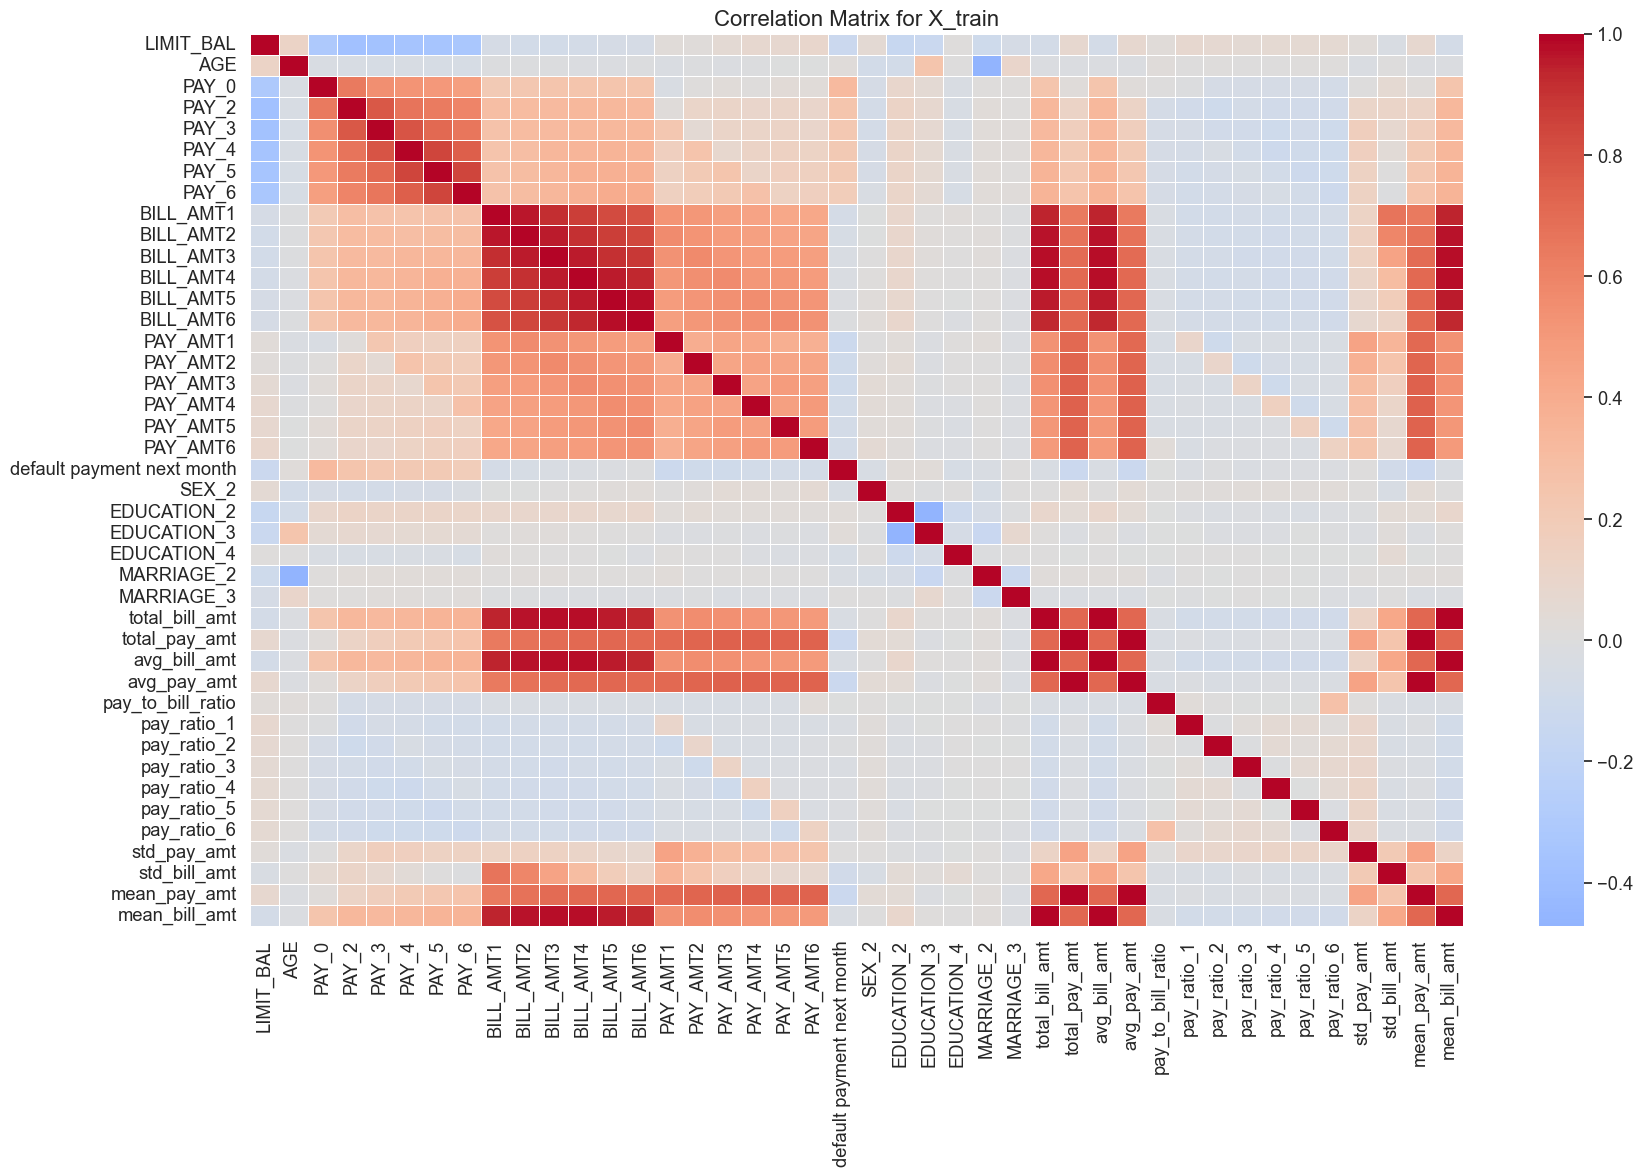

In [41]:
corr_matrix = df.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix for X_train', fontsize=16)
plt.tight_layout()
plt.show()

To reduce redundancy and improve model performance, and based in the previous correlation matrix, we decided to exclude the original BILL_AMT# and PAY_AMT# variables from the final feature set. These columns showed very high correlations with each other, and we had already created more informative aggregate features such as total_bill_amt, avg_bill_amt, pay_to_bill_ratio, and several monthly payment ratios. These engineered features capture the essential patterns and variability in billing and payment behavior, making the original columns unnecessary and helping to avoid multicollinearity in the model.

In [42]:
columns_to_drop = [
    'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
]

df =df.drop(columns=columns_to_drop)

In [43]:
columns_list = df.columns.tolist()
print(columns_list)

['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default payment next month', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_2', 'MARRIAGE_3', 'total_bill_amt', 'total_pay_amt', 'avg_bill_amt', 'avg_pay_amt', 'pay_to_bill_ratio', 'pay_ratio_1', 'pay_ratio_2', 'pay_ratio_3', 'pay_ratio_4', 'pay_ratio_5', 'pay_ratio_6', 'std_pay_amt', 'std_bill_amt', 'mean_pay_amt', 'mean_bill_amt']


# Data Splitting

To ensure that our feature transformations and model evaluation reflect real-world generalization, we first split the dataset into training and testing sets before applying any statistical operations such as scaling, normalization, or standardization. This prevents data leakage, where information from the test set could influence preprocessing decisions, leading to overly optimistic performance estimates. 

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=['default payment next month']),
    df['default payment next month'],
    test_size=0.2,
    random_state=42)

# Data Scaling

Scaling is a crucial step when working with numerical data. It ensures that all features are on the same scale, which can significantly improve the performance of  machine learning models, such as logistic regression, support vector machines (SVMs), and neural networks. Without scaling, features with larger numerical ranges might dominate the learning process, leading to biased results. Hence by standardizing the data (i.e., scaling it to have a mean of 0 and a standard deviation of 1), we ensure that the models treat each feature equally and are able to learn the relationships between them more effectively.

In [45]:
num_cols = ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
  'total_bill_amt', 'total_pay_amt', 'avg_bill_amt', 'avg_pay_amt', 'pay_to_bill_ratio',
  'pay_ratio_1', 'pay_ratio_2', 'pay_ratio_3', 'pay_ratio_4', 'pay_ratio_5', 'pay_ratio_6',
  'std_pay_amt', 'std_bill_amt', 'mean_pay_amt', 'mean_bill_amt']

In [46]:
print("Has inf values:", np.isinf(X_train[num_cols]).any().any())
print("Has NaNs:", X_train[num_cols].isna().any().any())

Has inf values: True
Has NaNs: True


In [47]:
# Replace inf with NaN
X_train[num_cols] = X_train[num_cols].replace([np.inf, -np.inf], np.nan)
X_test[num_cols] = X_test[num_cols].replace([np.inf, -np.inf], np.nan)

# Drop rows with NaNs AND update y_train/y_test accordingly
X_train = X_train.dropna(subset=num_cols)
y_train = y_train.loc[X_train.index]

X_test = X_test.dropna(subset=num_cols)
y_test = y_test.loc[X_test.index]

In [48]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


# Feature Selection

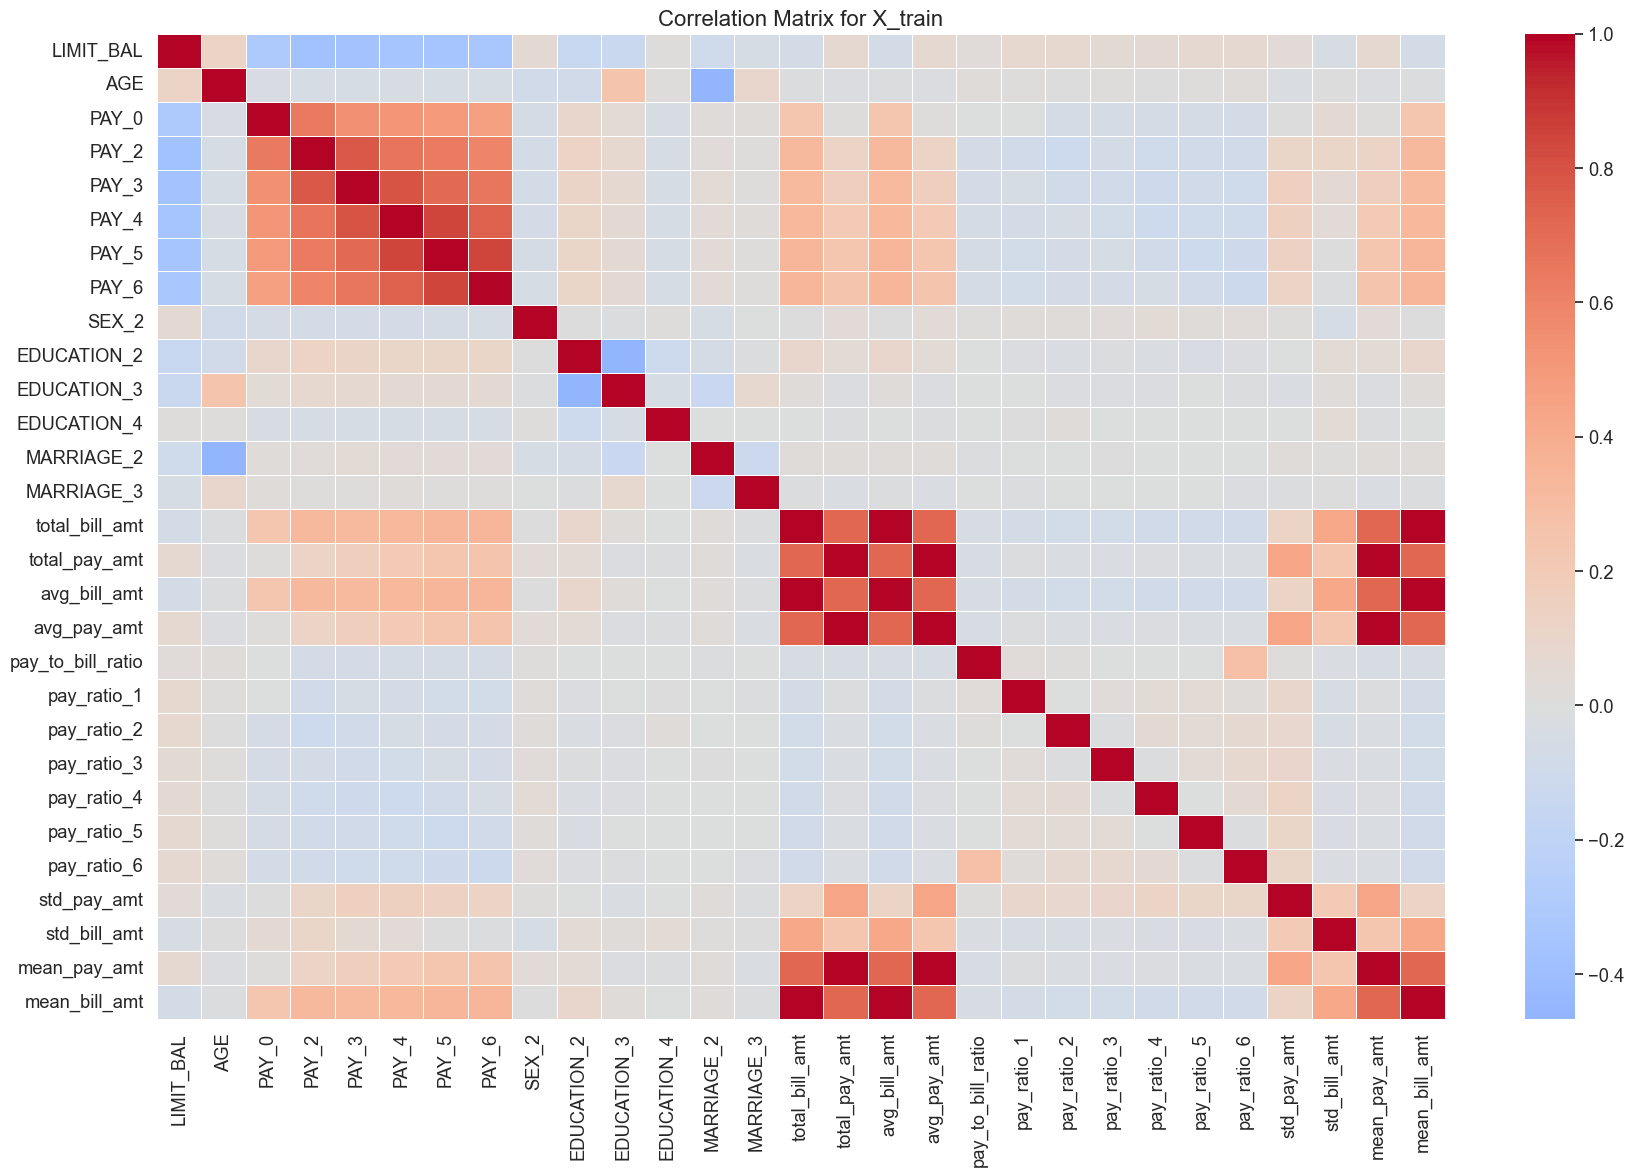

In [49]:
corr_matrix = X_train.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix for X_train', fontsize=16)
plt.tight_layout()
plt.show()

In order to avoid different problems in our ML algorithms, we will conduct different Feature Selection techniques to get the best predictors. 

## Correlation Analysis

In [50]:
correlation_new = X_train.corrwith(pd.Series(y_train)).abs().sort_values(ascending=False)
print(correlation_new[:15])

PAY_0            0.315676
PAY_2            0.248383
PAY_3            0.223220
PAY_4            0.213821
PAY_5            0.201423
PAY_6            0.187905
LIMIT_BAL        0.125574
total_pay_amt    0.119861
mean_pay_amt     0.119861
avg_pay_amt      0.119861
std_bill_amt     0.082154
EDUCATION_4      0.049813
SEX_2            0.045629
MARRIAGE_2       0.034059
EDUCATION_2      0.031160
dtype: float64


## Recursive Feature Elimination (RFE)

In [51]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=15) 
fit = rfe.fit(X_train, y_train)

selected_features1 = X_train.columns[fit.support_]
selected_features1

Index(['PAY_0', 'PAY_2', 'PAY_4', 'PAY_6', 'SEX_2', 'EDUCATION_4',
       'MARRIAGE_2', 'MARRIAGE_3', 'total_bill_amt', 'total_pay_amt',
       'avg_pay_amt', 'pay_ratio_1', 'std_pay_amt', 'std_bill_amt',
       'mean_pay_amt'],
      dtype='object')

## Tree-Based Models

In [52]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
selected_features2 = X_train.columns[indices[:15]] 
selected_features2

Index(['PAY_0', 'AGE', 'LIMIT_BAL', 'std_bill_amt', 'std_pay_amt',
       'total_bill_amt', 'mean_bill_amt', 'pay_to_bill_ratio', 'avg_bill_amt',
       'pay_ratio_1', 'total_pay_amt', 'mean_pay_amt', 'avg_pay_amt',
       'pay_ratio_2', 'PAY_2'],
      dtype='object')

## Lasso

In [53]:
model = Lasso(alpha=0.01) 
model.fit(X_train, y_train)
selected_features3 = X_train.columns[model.coef_ != 0]
print(selected_features3)

Index(['AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
       'total_pay_amt', 'avg_pay_amt', 'std_pay_amt', 'std_bill_amt',
       'mean_pay_amt'],
      dtype='object')


## Forward Selection

In [54]:
model = LogisticRegression()
sfs = SequentialFeatureSelector(model, forward=True, k_features=15) 
sfs.fit(X_train, y_train)
selected_features5 = list(sfs.k_feature_names_)
print(selected_features5)

['LIMIT_BAL', 'PAY_0', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'MARRIAGE_3', 'pay_to_bill_ratio', 'pay_ratio_1', 'pay_ratio_2', 'pay_ratio_3', 'pay_ratio_4', 'pay_ratio_5', 'pay_ratio_6', 'std_pay_amt']


## Backward Selection

In [55]:
model = LogisticRegression()
sfs = SequentialFeatureSelector(model, forward=False, k_features=15) 
sfs.fit(X_train, y_train)
selected_features6 = list(sfs.k_feature_names_)
print(selected_features6)

['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_4', 'PAY_6', 'EDUCATION_3', 'EDUCATION_4', 'total_bill_amt', 'total_pay_amt', 'pay_ratio_1', 'pay_ratio_2', 'pay_ratio_3', 'std_pay_amt', 'std_bill_amt']


After the previous searching we decided that our best features are:

In [56]:
selected_15_features = [
    'PAY_0',          
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'MARRIAGE_2',
    'SEX_2',
    'LIMIT_BAL',
    'AGE',
    'total_pay_amt',
    'avg_pay_amt',
    'mean_pay_amt',
    'std_pay_amt',
    'std_bill_amt',
    'avg_bill_amt',
    'pay_to_bill_ratio'
]

In [57]:
X_train= X_train[selected_15_features]
X_test = X_test[selected_15_features]

# Balancing 

Since the data is imbalanced we need to sample it to balance it

## Under Sampling

In [58]:
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)
class_counts = np.bincount(y_resampled)
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

Class 0 count: 3828
Class 1 count: 3828


## Over Sampling

In [59]:
over_sampler = RandomOverSampler(random_state=42)
X_resampled2, y_resampled2 = over_sampler.fit_resample(X_train, y_train)
class_counts = np.bincount(y_resampled2)
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

Class 0 count: 10789
Class 1 count: 10789


## SMOTE (Synthetic Minority Over-sampling Technique)

In [60]:
smote = SMOTE(random_state=42)
X_resampled3, y_resampled3 = smote.fit_resample(X_train, y_train)
class_counts = np.bincount(y_resampled3)
print("Class 0 count:", class_counts[0])
print("Class 1 count:", class_counts[1])

Class 0 count: 10789
Class 1 count: 10789


We will select the SMOTE results

In [61]:
X_train = X_resampled3
y_train = y_resampled3 

# ML Models

We will store all the result to later compare between models and get the best solution.

In [62]:
model_results = []
roc_curves = []

## Initial Functions

In [63]:
def evaluate_model(name, model, grid_search, X_train, X_test, y_train, y_test,
                   y_pred, y_proba, model_results, roc_curves):
    # Accuracy
    train_acc = model.score(X_train, y_train) * 100
    #val_acc = grid_search.best_score_ * 100
    #val_acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    try:
        val_acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')) * 100
    except Exception as e:
        print(f"[Warning] Could not compute validation accuracy for {name}: {e}")
        val_acc = np.nan

    # Class 1 metrics
    precision_1 = precision_score(y_test, y_pred, pos_label=1)
    recall_1 = recall_score(y_test, y_pred, pos_label=1)
    f1_1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_proba)
    pr_auc = average_precision_score(y_test, y_proba)

    # Save to results list
    model_results.append({
        'Model': name,
        'Train Accuracy (%)': round(train_acc, 2),
        'Validation Accuracy (%)': round(val_acc, 2),
        'Test Accuracy (%)': round(test_acc, 2),
        'ROC-AUC': round(roc_auc, 4),
        'Precision (Class 1)': round(precision_1, 4),
        'Recall (Class 1)': round(recall_1, 4),
        'F1-Score (Class 1)': round(f1_1, 4),
        'PR AUC': round(pr_auc, 4)
    })

    # Save ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves.append((name, fpr, tpr, roc_auc))

In [64]:
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


In [65]:
def plot_precision_recall_curve(y_test, y_proba, model_name):
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap_score = average_precision_score(y_test, y_proba)

    plt.figure(figsize=(6, 5))
    plt.plot(recall, precision, label=f'{model_name} (AP = {ap_score:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.grid(True)
    plt.legend()
    plt.show()


In [66]:
def plot_learning_curve(model, X_train, y_train, model_name):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=1,
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(6, 5))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-Validation Score')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Learning Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Logistic Regression

In [67]:
# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs']  
}

# Initialize base model
base_log = LogisticRegression(max_iter=1000)

# GridSearchCV
grid_log = GridSearchCV(base_log, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_log.fit(X_train, y_train)

# Best estimator
best_log = grid_log.best_estimator_

# Predict on test set
y_pred_log = best_log.predict(X_test)
y_proba_log = best_log.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", grid_log.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

roc_auc_log = roc_auc_score(y_test, y_proba_log)
print(f"\nROC AUC Score: {roc_auc_log:.4f}")

Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Confusion Matrix:
[[1964  672]
 [ 356  664]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.75      0.79      2636
           1       0.50      0.65      0.56      1020

    accuracy                           0.72      3656
   macro avg       0.67      0.70      0.68      3656
weighted avg       0.75      0.72      0.73      3656


ROC AUC Score: 0.7447


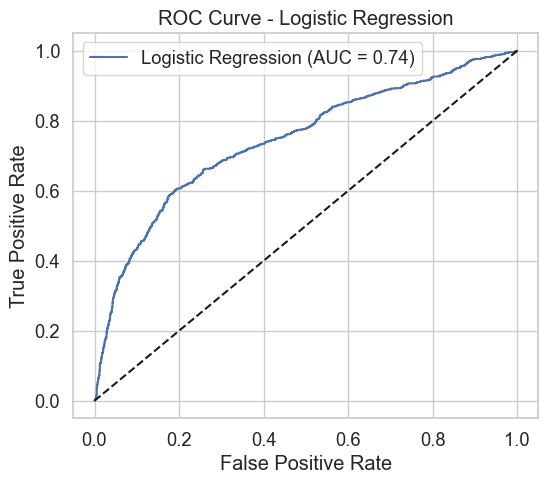

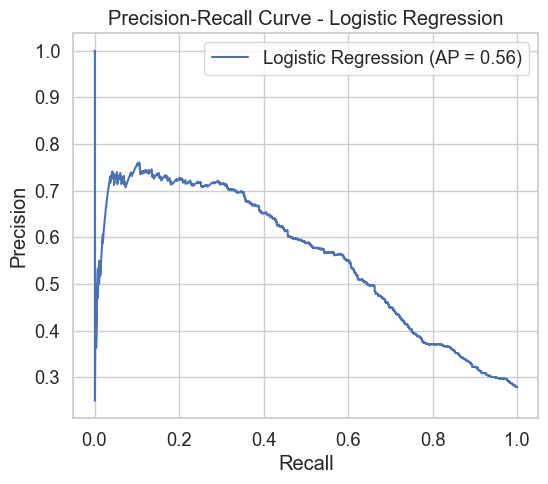

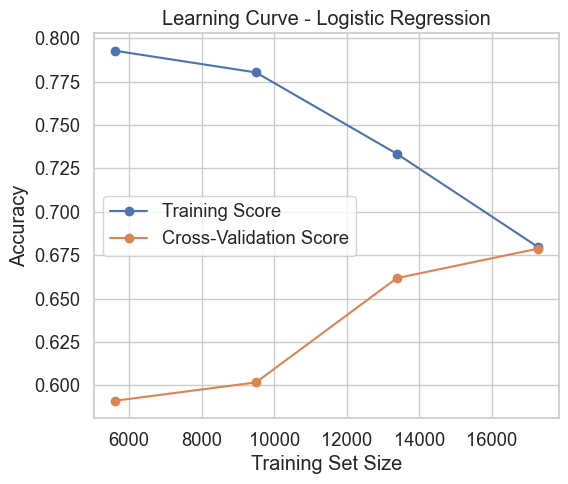

In [68]:
plot_roc_curve(y_test, y_proba_log, 'Logistic Regression')
plot_precision_recall_curve(y_test, y_proba_log, 'Logistic Regression')
plot_learning_curve(best_log, X_train, y_train, 'Logistic Regression')

In [69]:
evaluate_model(
    name='Logistic Regression',
    model=best_log,
    grid_search=grid_log,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_log,
    y_proba=y_proba_log,
    model_results=model_results,
    roc_curves=roc_curves
)

### Scratch Approach

In [70]:
class CustomLogisticRegression(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.1, lambda_=1.0, max_iter=1000, tol=1e-4):
        self.learning_rate = learning_rate
        self.lambda_ = lambda_
        self.max_iter = max_iter
        self.tol = tol

    def _sigmoid(self, z):
        return expit(z)

    def _loss_grad(self, X, y, w):
        n = X.shape[0]
        z = X @ w
        p = self._sigmoid(z)

        # L2 Regularization Loss (excluding bias term)
        loss = -np.mean(y * np.log(p + 1e-9) + (1 - y) * np.log(1 - p + 1e-9))
        loss += (self.lambda_ / 2) * np.sum(w[1:] ** 2)

        # Gradient with L2 (excluding bias from regularization)
        grad = X.T @ (p - y) / n
        grad[1:] += self.lambda_ * w[1:]
        return loss, grad

    def fit(self, X, y):
        X, y = check_X_y(X, y)
        X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add bias
        self.w_ = np.zeros(X.shape[1])

        for _ in range(self.max_iter):
            loss, grad = self._loss_grad(X, y, self.w_)
            w_new = self.w_ - self.learning_rate * grad
            if np.linalg.norm(w_new - self.w_, ord=1) < self.tol:
                break
            self.w_ = w_new

        return self

    def predict_proba(self, X):
        X = check_array(X)
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        prob = self._sigmoid(X @ self.w_)
        return np.vstack([1 - prob, prob]).T

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)
    
    def score(self, X, y):
        return accuracy_score(y, self.predict(X))



In [71]:
# Parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'lambda_': [0.01, 0.1, 1.0, 10.0]
}

# Initialize base model
base_log = CustomLogisticRegression(max_iter=1000)

# GridSearchCV
grid_log = GridSearchCV(base_log, param_grid, cv=5, scoring='roc_auc', n_jobs=1)
grid_log.fit(X_train, y_train)

# Best estimator
best_log = grid_log.best_estimator_

# Predict on test set
y_pred_log = best_log.predict(X_test)
y_proba_log = best_log.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", grid_log.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))

roc_auc_log = roc_auc_score(y_test, y_proba_log)
print(f"\nROC AUC Score: {roc_auc_log:.4f}")

Best Parameters: {'lambda_': 0.01, 'learning_rate': 0.01}
Confusion Matrix:
[[1878  758]
 [ 333  687]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2636
           1       0.48      0.67      0.56      1020

    accuracy                           0.70      3656
   macro avg       0.66      0.69      0.67      3656
weighted avg       0.75      0.70      0.71      3656


ROC AUC Score: 0.7442


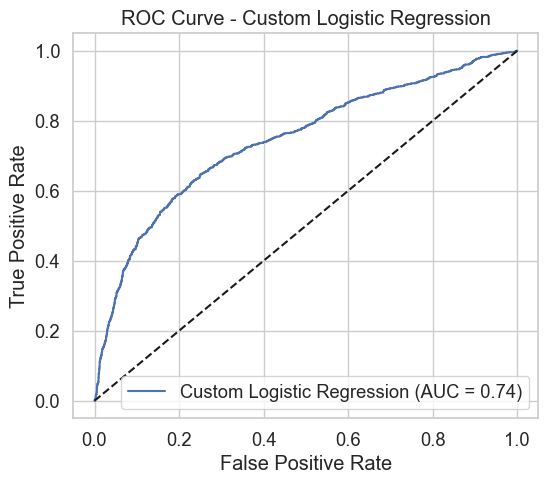

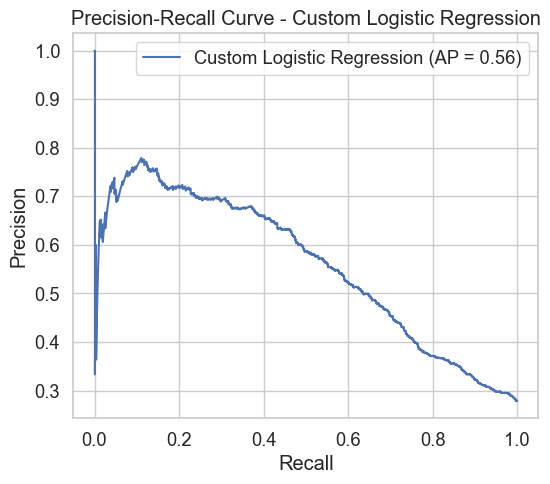

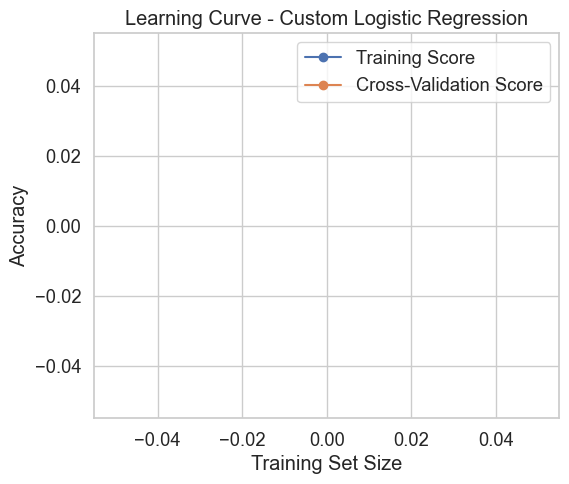

In [72]:
plot_roc_curve(y_test, y_proba_log, 'Custom Logistic Regression')
plot_precision_recall_curve(y_test, y_proba_log, 'Custom Logistic Regression')
plot_learning_curve(best_log, X_train, y_train, 'Custom Logistic Regression')

In [73]:
evaluate_model(
    name='Custom Logistic Regression',
    model=best_log,
    grid_search=grid_log,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_log,
    y_proba=y_proba_log,
    model_results=model_results,
    roc_curves=roc_curves
)

## Gaussian Naive Bayes

In [74]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

best_nb  = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
best_nb.fit(X_train, y_train)

y_pred_nb = best_nb.predict(X_test)
y_proba_nb = best_nb.predict_proba(X_test)[:, 1] 

print("Model: Gaussian Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print(f"\nROC AUC Score: {roc_auc_nb:.4f}")

Model: Gaussian Naive Bayes
Confusion Matrix:
[[1662  974]
 [ 316  704]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      2636
           1       0.42      0.69      0.52      1020

    accuracy                           0.65      3656
   macro avg       0.63      0.66      0.62      3656
weighted avg       0.72      0.65      0.67      3656


ROC AUC Score: 0.7338


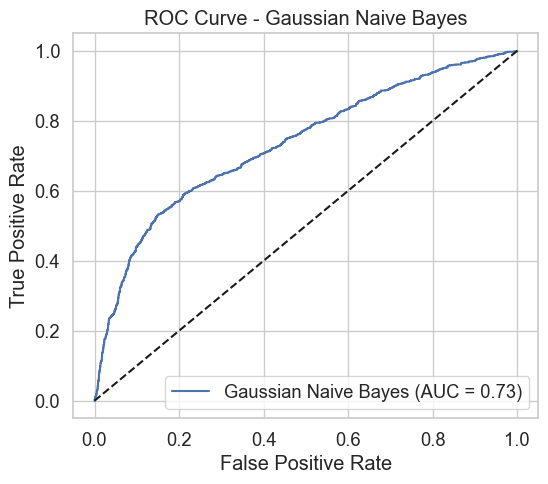

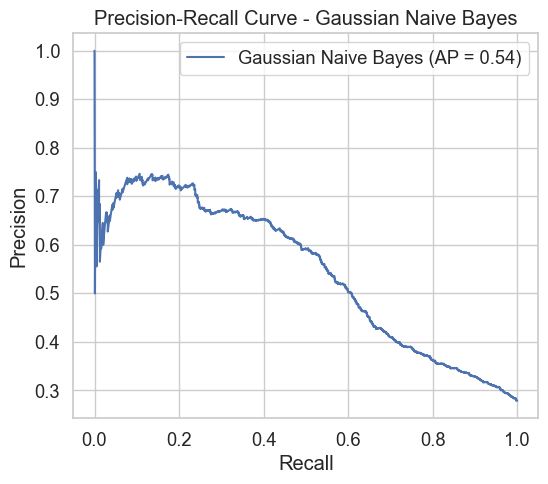

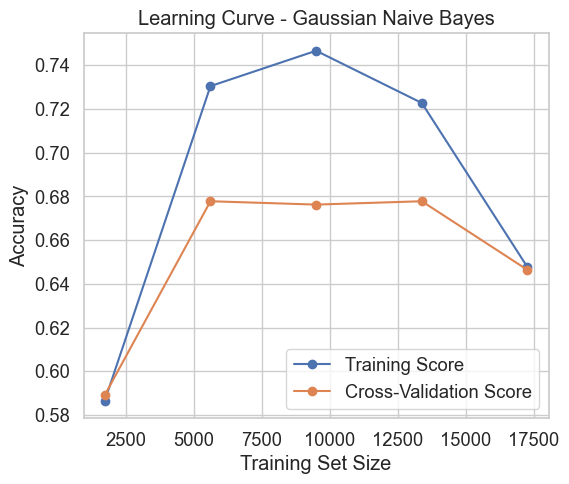

In [75]:
plot_roc_curve(y_test, y_proba_nb, 'Gaussian Naive Bayes')
plot_precision_recall_curve(y_test, y_proba_nb, 'Gaussian Naive Bayes')
plot_learning_curve(best_nb.best_estimator_, X_train, y_train, 'Gaussian Naive Bayes')

In [76]:
evaluate_model(
    name='Gaussian Naive Bayes',
    model=best_nb.best_estimator_,
    grid_search=best_nb,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_nb,
    y_proba=y_proba_nb,
    model_results=model_results,
    roc_curves=roc_curves
)


### Scratch Approach

In [77]:
class CustomGaussianNB(BaseEstimator, ClassifierMixin):
    def __init__(self, var_smoothing=1e-9):
        self.var_smoothing = var_smoothing

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.class_prior_ = np.array([(y == c).mean() for c in self.classes_])
        self.theta_ = np.array([X[y == c].mean(axis=0) for c in self.classes_])
        self.sigma_ = np.array([
            X[y == c].var(axis=0, ddof=0) + self.var_smoothing
            for c in self.classes_
        ])
        return self

    def _calculate_log_prob(self, X):
        log_probs = []
        for idx, c in enumerate(self.classes_):
            mean = self.theta_[idx]
            var = self.sigma_[idx]
            log_prior = np.log(self.class_prior_[idx])
            log_likelihood = -0.5 * np.sum(np.log(2. * np.pi * var))
            log_likelihood -= 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
            log_probs.append(log_prior + log_likelihood)
        return np.array(log_probs).T

    def predict(self, X):
        log_probs = self._calculate_log_prob(X)
        return self.classes_[np.argmax(log_probs, axis=1)]

    def predict_proba(self, X):
        log_probs = self._calculate_log_prob(X)
        probs = np.exp(log_probs)
        probs /= probs.sum(axis=1, keepdims=True)
        return probs

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))

In [78]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

best_custom_nb = GridSearchCV(CustomGaussianNB(), param_grid, cv=5, scoring='accuracy')
best_custom_nb.fit(X_train, y_train)

y_pred_nb = best_custom_nb.predict(X_test)
y_proba_nb = best_custom_nb.predict_proba(X_test)[:, 1]

print("Model: Custom Gaussian Naive Bayes")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print(f"\nROC AUC Score: {roc_auc_nb:.4f}")

Model: Custom Gaussian Naive Bayes
Confusion Matrix:
[[1662  974]
 [ 316  704]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.63      0.72      2636
           1       0.42      0.69      0.52      1020

    accuracy                           0.65      3656
   macro avg       0.63      0.66      0.62      3656
weighted avg       0.72      0.65      0.67      3656


ROC AUC Score: 0.7338


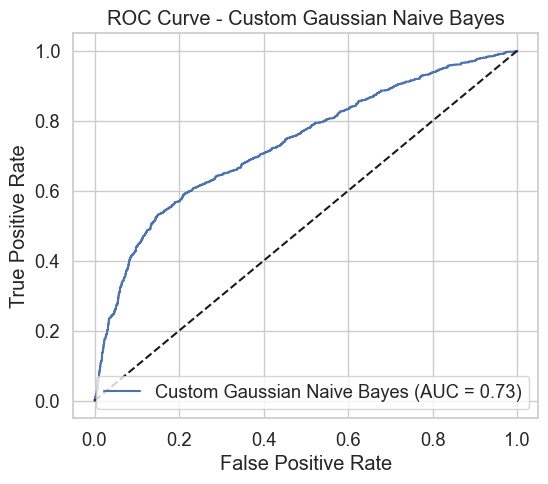

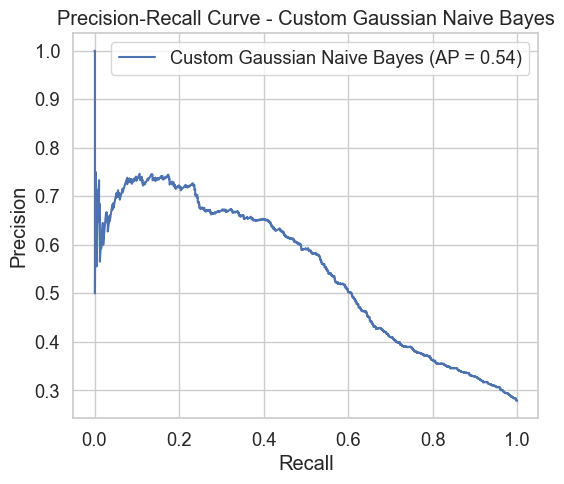

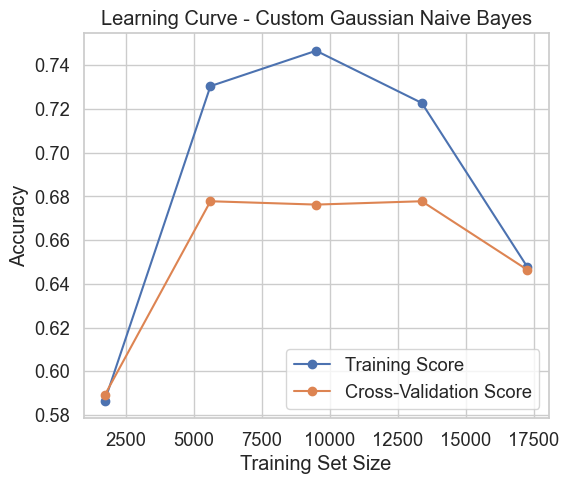

In [79]:
plot_roc_curve(y_test, y_proba_nb, 'Custom Gaussian Naive Bayes')
plot_precision_recall_curve(y_test, y_proba_nb, 'Custom Gaussian Naive Bayes')
plot_learning_curve(best_custom_nb, X_train, y_train, 'Custom Gaussian Naive Bayes')

In [80]:
evaluate_model(
    name='Custom Gaussian Naive Bayes',
    model=best_custom_nb,
    grid_search=None,  
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_nb,
    y_proba=y_proba_nb,
    model_results=model_results,
    roc_curves=roc_curves
)

## Neural Networks

In [81]:
# GridSearchCV
param_grid = {
    # 'hidden_layer_sizes': [(64,), (64, 32), (128,), (128, 64)], 
    'activation': ['relu', 'tanh'],
    'solver': ['sgd'],
    'max_iter': [10, 20, 50]
}
clf = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model
best_params = grid_search.best_params_
best_clf = MLPClassifier(**best_params, random_state=42)
best_clf.fit(X_train, y_train)

# Predictions
y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]


In [82]:
print("Model: MLP Classifier")
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc_nn = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc_nn:.2f}")

Model: MLP Classifier
Best Parameters: {'activation': 'relu', 'max_iter': 50, 'solver': 'sgd'}
Accuracy: 0.75

Confusion Matrix:
[[2091  545]
 [ 380  640]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      2636
           1       0.54      0.63      0.58      1020

    accuracy                           0.75      3656
   macro avg       0.69      0.71      0.70      3656
weighted avg       0.76      0.75      0.75      3656

ROC-AUC Score: 0.78


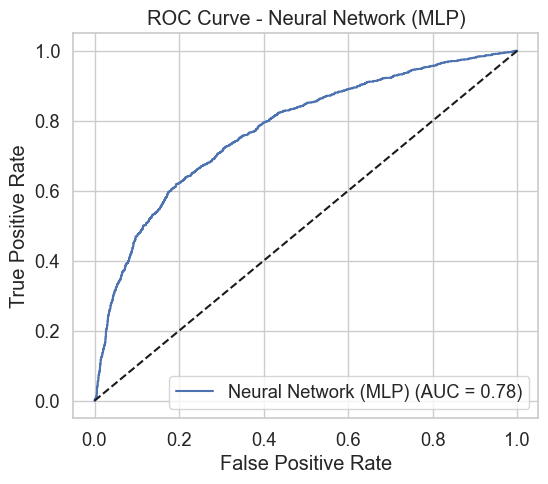

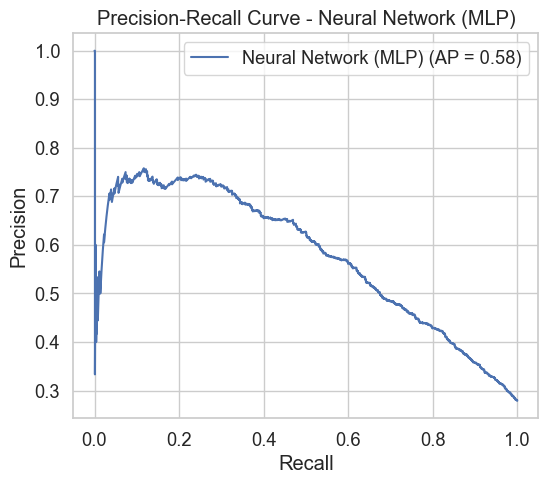

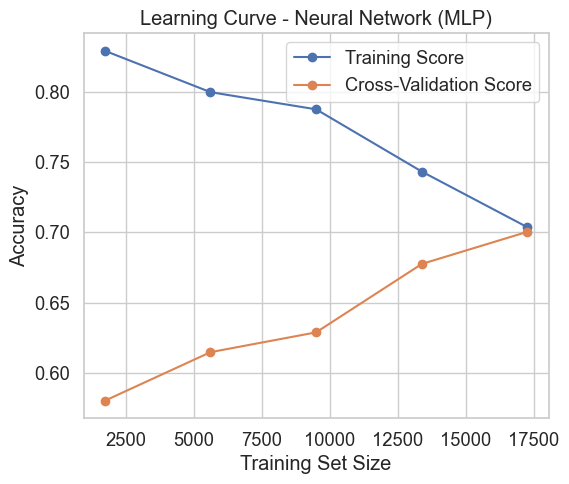

In [83]:
plot_roc_curve(y_test, y_proba, 'Neural Network (MLP)')
plot_precision_recall_curve(y_test, y_proba, 'Neural Network (MLP)')
plot_learning_curve(best_clf, X_train, y_train, 'Neural Network (MLP)')

In [84]:
evaluate_model(
    name='Neural Network (MLP)',
    model=best_clf,
    grid_search=grid_search,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    y_proba=y_proba,
    model_results=model_results,
    roc_curves=roc_curves
)

### Scratch Approach

In [85]:
class CustomMLPClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, hidden_layer_size=32, activation='relu', solver='sgd',
                 learning_rate=0.001, alpha=0.0001, max_iter=100, batch_size=32, random_state=None):
        self.hidden_layer_size = hidden_layer_size
        self.activation = activation
        self.solver = solver
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.random_state = random_state

    def _activation(self, z):
        if self.activation == 'relu':
            return np.maximum(0, z)
        elif self.activation == 'tanh':
            return np.tanh(z)
        else:
            raise ValueError(f"Unsupported activation: {self.activation}")

    def _activation_derivative(self, z):
        if self.activation == 'relu':
            return (z > 0).astype(float)
        elif self.activation == 'tanh':
            return 1.0 - np.tanh(z) ** 2

    def _sigmoid(self, z):
        z = np.asarray(z, dtype=np.float64)
        return 1 / (1 + np.exp(-z))

    def _initialize_weights(self, input_size, output_size):
        rng = np.random.RandomState(self.random_state)
        if self.activation == 'relu':
            stddev = np.sqrt(2.0 / input_size)
        elif self.activation == 'tanh':
            stddev = np.sqrt(1.0 / input_size)
        else:
            stddev = 0.01
        W = rng.randn(input_size, output_size) * stddev
        b = np.zeros((1, output_size))
        return W, b

    def _generate_batches(self, X, y):
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        for start in range(0, X.shape[0], self.batch_size):
            end = min(start + self.batch_size, X.shape[0])
            batch_idx = indices[start:end]
            yield X[batch_idx], y[batch_idx]

    def fit(self, X, y):
        if self.solver != 'sgd':
            raise NotImplementedError("Only 'sgd' solver is currently supported.")

        X = np.asarray(X, dtype=np.float64)
        y = np.asarray(y).reshape(-1, 1)
        n_samples, n_features = X.shape

        # Initialize weights
        self.W1, self.b1 = self._initialize_weights(n_features, self.hidden_layer_size)
        self.W2, self.b2 = self._initialize_weights(self.hidden_layer_size, 1)

        for epoch in range(self.max_iter):
            for X_batch, y_batch in self._generate_batches(X, y):
                # Forward pass
                Z1 = X_batch @ self.W1 + self.b1
                A1 = self._activation(Z1)
                Z2 = A1 @ self.W2 + self.b2
                A2 = self._sigmoid(Z2)
                A2 = np.clip(A2, 1e-8, 1 - 1e-8) 

                # Backward pass
                dZ2 = A2 - y_batch
                dW2 = (A1.T @ dZ2) / len(X_batch) + self.alpha * self.W2
                db2 = np.sum(dZ2, axis=0, keepdims=True) / len(X_batch)

                dA1 = dZ2 @ self.W2.T
                dZ1 = dA1 * self._activation_derivative(Z1)
                dW1 = (X_batch.T @ dZ1) / len(X_batch) + self.alpha * self.W1
                db1 = np.sum(dZ1, axis=0, keepdims=True) / len(X_batch)

                # Update weights
                self.W1 -= self.learning_rate * dW1
                self.b1 -= self.learning_rate * db1
                self.W2 -= self.learning_rate * dW2
                self.b2 -= self.learning_rate * db2

        return self

    def predict_proba(self, X):
        X = np.asarray(X, dtype=np.float64)
        Z1 = X @ self.W1 + self.b1
        A1 = self._activation(Z1)
        Z2 = A1 @ self.W2 + self.b2
        A2 = self._sigmoid(Z2)
        return np.hstack([1 - A2, A2])

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)

    def score(self, X, y):
        return accuracy_score(y, self.predict(X))


In [86]:
param_grid = {
    'activation': ['relu', 'tanh'],
    'max_iter': [30, 50],
    'batch_size': [32, 64],
    'learning_rate': [0.001, 0.01],
    'alpha': [0.0001],# L2 regularization
    'solver': ['sgd']            
}
grid_search = GridSearchCV(
    estimator=CustomMLPClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='roc_auc',
    n_jobs=1,  
    verbose=1
)
grid_search.fit(X_train, y_train)

best_clf = grid_search.best_estimator_

y_pred = best_clf.predict(X_test)
y_proba = best_clf.predict_proba(X_test)[:, 1]

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [87]:
print("Model: Custom Neural Network")
print("Best Parameters:", grid_search.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc_nn = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc_nn:.2f}")

Model: Custom Neural Network
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'batch_size': 32, 'learning_rate': 0.001, 'max_iter': 30, 'solver': 'sgd'}
Accuracy: 0.73

Confusion Matrix:
[[2014  622]
 [ 366  654]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2636
           1       0.51      0.64      0.57      1020

    accuracy                           0.73      3656
   macro avg       0.68      0.70      0.69      3656
weighted avg       0.75      0.73      0.74      3656

ROC-AUC Score: 0.76


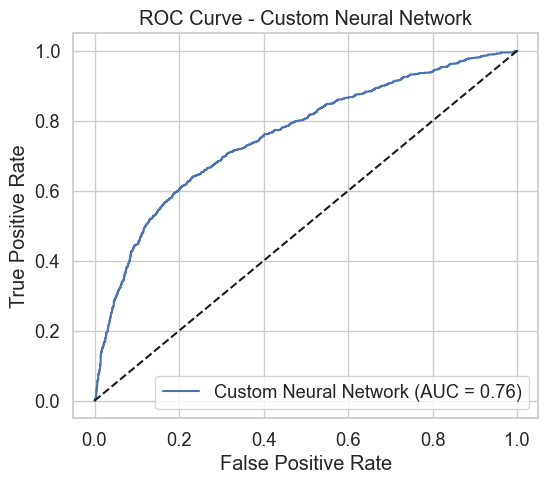

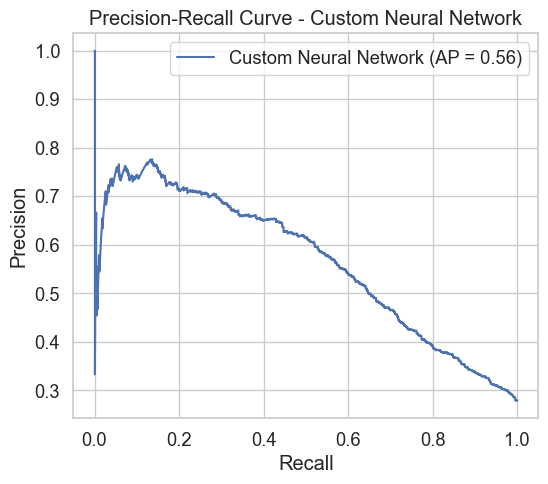

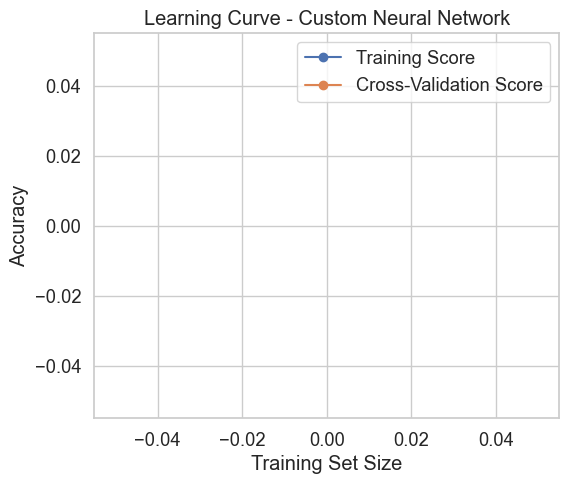

In [88]:
plot_roc_curve(y_test, y_proba, 'Custom Neural Network')
plot_precision_recall_curve(y_test, y_proba, 'Custom Neural Network')
plot_learning_curve(best_clf, X_train, y_train, 'Custom Neural Network')

In [89]:
evaluate_model(
    name='Custom Neural Network',
    model=best_clf,
    grid_search=grid_search,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    y_proba=y_proba,
    model_results=model_results,
    roc_curves=roc_curves
)

## Decision Trees

In [90]:
# Parameter grid for tuning
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Base model
base_tree = DecisionTreeClassifier(random_state=42)

# GridSearchCV 
grid_tree = GridSearchCV(base_tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_tree.fit(X_train, y_train)

# Best model 
best_tree = grid_tree.best_estimator_

# Predictions
y_pred_tree = best_tree.predict(X_test)
y_proba_tree = best_tree.predict_proba(X_test)[:, 1]

# Metrics
print("Best Parameters:", grid_tree.best_params_)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

roc_auc_tree = roc_auc_score(y_test, y_proba_tree)
print(f"\nROC AUC Score: {roc_auc_tree:.4f}")

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Confusion Matrix:
[[2088  548]
 [ 463  557]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2636
           1       0.50      0.55      0.52      1020

    accuracy                           0.72      3656
   macro avg       0.66      0.67      0.66      3656
weighted avg       0.73      0.72      0.73      3656


ROC AUC Score: 0.7151


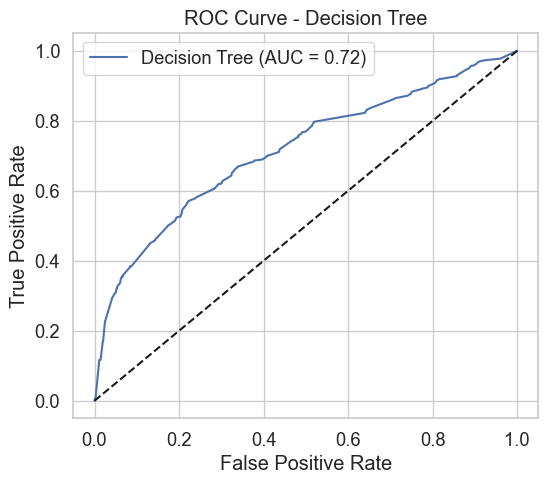

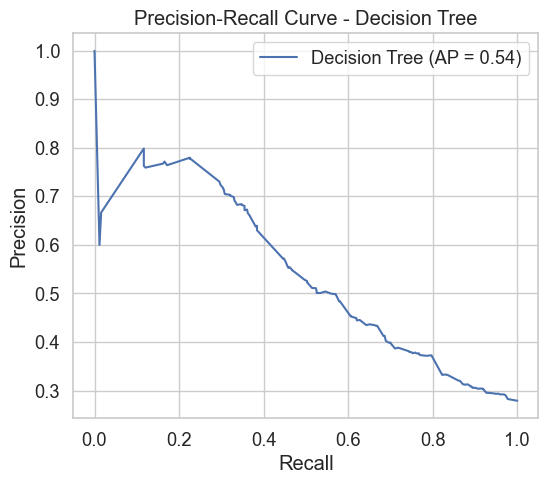

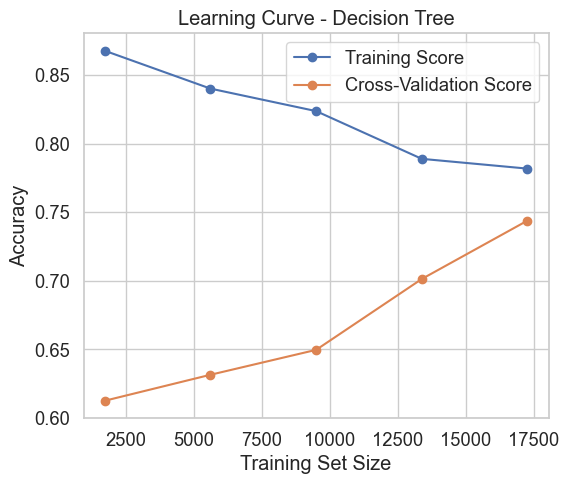

In [91]:
plot_roc_curve(y_test, y_proba_tree, 'Decision Tree')
plot_precision_recall_curve(y_test, y_proba_tree, 'Decision Tree')
plot_learning_curve(best_tree, X_train, y_train, 'Decision Tree')

In [92]:
evaluate_model(
    name='Decision Tree',
    model=best_tree,
    grid_search=grid_tree,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_tree,
    y_proba=y_proba_tree,
    model_results=model_results,
    roc_curves=roc_curves
)


## Random Forest

In [93]:
# Parameter grid
rfc = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20, 30],
    'max_depth': [2, 3, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4, 8],
}

# Grid Search
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    scoring='roc_auc',  
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Best model
best_params = grid_search.best_params_
best_rfc = RandomForestClassifier(**best_params, random_state=42)
best_rfc.fit(X_train, y_train)

y_pred = best_rfc.predict(X_test)
y_proba = best_rfc.predict_proba(X_test)[:, 1]

print("Model: Random Forest")
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model: Random Forest
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
Accuracy: 0.76
ROC-AUC Score: 0.78

Confusion Matrix:
[[2174  462]
 [ 407  613]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2636
           1       0.57      0.60      0.59      1020

    accuracy                           0.76      3656
   macro avg       0.71      0.71      0.71      3656
weighted avg       0.77      0.76      0.76      3656



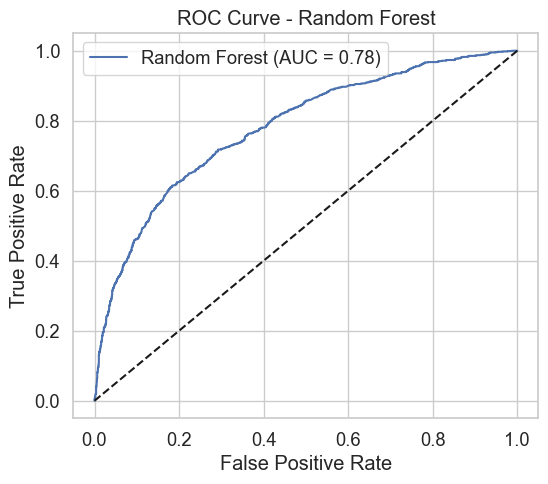

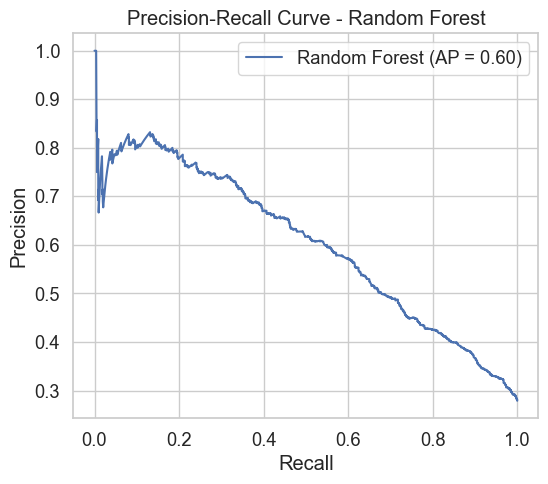

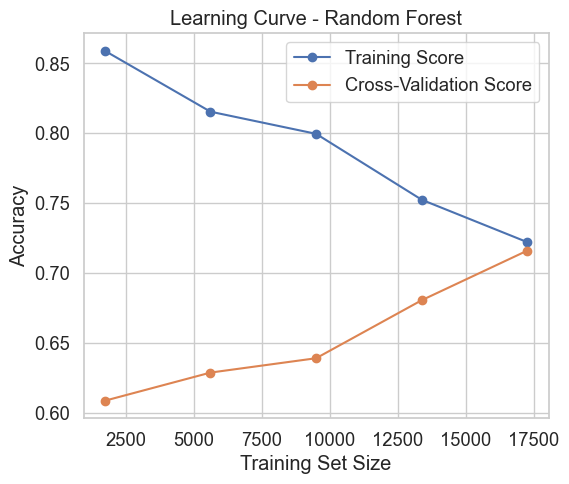

In [94]:
evaluate_model("Random Forest", best_rfc, grid_search, X_train, X_test, y_train, y_test, y_pred, y_proba, model_results, roc_curves)
plot_roc_curve(y_test, y_proba, "Random Forest")
plot_precision_recall_curve(y_test, y_proba, "Random Forest")
plot_learning_curve(best_rfc, X_train, y_train, "Random Forest")

## Boosting (with AdaBoost)

In [95]:
# Parameter grid
param_grid_ada = {
    'n_estimators': [50, 100],
    'learning_rate': [0.5, 1.0]
}

# Grid Search
ada = AdaBoostClassifier(random_state=42)
grid_ada = GridSearchCV(ada, param_grid_ada, cv=3, scoring='roc_auc', n_jobs=-1)
grid_ada.fit(X_train, y_train)

# Best model
best_ada = grid_ada.best_estimator_

# Make predictions
y_pred = best_ada.predict(X_test)
y_prob = best_ada.predict_proba(X_test)[:, 1]

print("Best Parameters:", grid_ada.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
Accuracy: 0.75

Confusion Matrix:
[[2185  451]
 [ 446  574]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      2636
           1       0.56      0.56      0.56      1020

    accuracy                           0.75      3656
   macro avg       0.70      0.70      0.70      3656
weighted avg       0.76      0.75      0.75      3656

ROC-AUC Score: 0.77


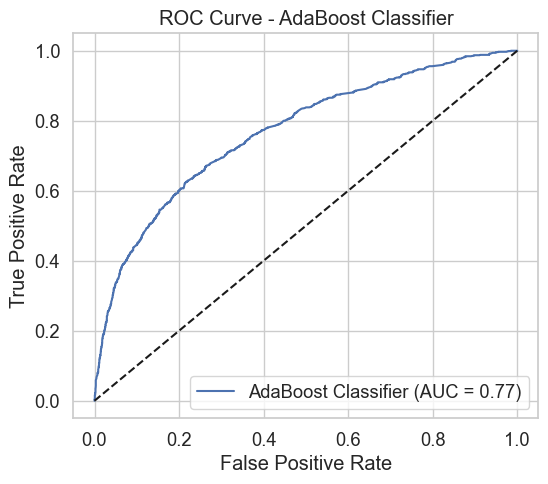

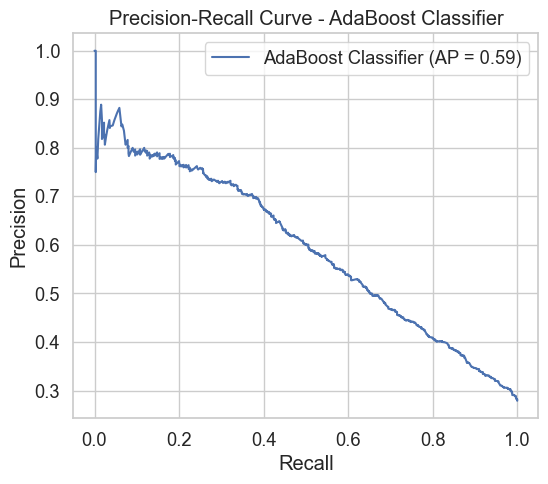

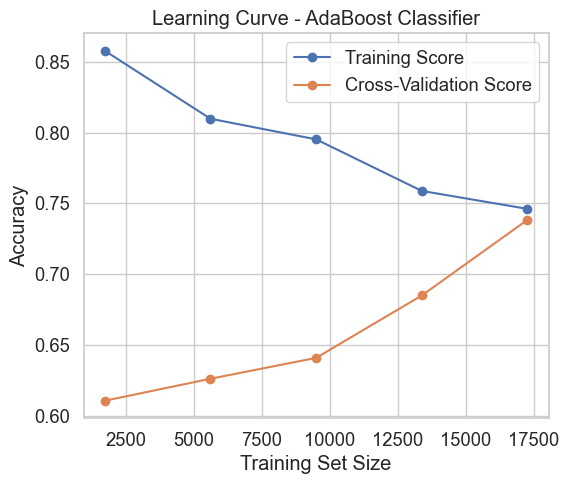

In [96]:
evaluate_model(
    name='AdaBoost Classifier',
    model=best_ada,
    grid_search=grid_ada,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred,
    y_proba=y_prob,
    model_results=model_results,
    roc_curves=roc_curves
)

plot_roc_curve(y_test, y_prob, 'AdaBoost Classifier')
plot_precision_recall_curve(y_test, y_prob, 'AdaBoost Classifier')
plot_learning_curve(best_ada, X_train, y_train, 'AdaBoost Classifier')


## Support Vector Machine

We have decided to skip this approach since it is taking too long to run. The two cells below can take up to 40 mins to run.

### Grid Search 
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],  
    'probability': [True]  
}
svm = SVC(random_state=42)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='roc_auc', n_jobs=-1)
grid_svm.fit(X_train, y_train)

###  Best model
best_svm = grid_svm.best_estimator_

### Predictions 
y_pred_svm = best_svm.predict(X_test)
y_proba_svm = best_svm.predict_proba(X_test)[:, 1] 

print("Model: Support Vector Machine (SVM)")
print("Best Parameters:", grid_svm.best_params_)
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f"ROC-AUC Score: {roc_auc_svm:.2f}")

evaluate_model(
    name='Support Vector Machine (SVM)',
    model=best_svm,
    grid_search=grid_svm,
    X_train=X_train,
    X_test=X_test,
    y_train=y_train,
    y_test=y_test,
    y_pred=y_pred_svm,
    y_proba=y_proba_svm,
    model_results=model_results,
    roc_curves=roc_curves
)

plot_roc_curve(y_test, y_proba_svm, 'Support Vector Machine (SVM)')
plot_precision_recall_curve(y_test, y_proba_svm, 'Support Vector Machine (SVM)')
plot_learning_curve(best_svm, X_train, y_train, 'Support Vector Machine (SVM)')

# Results

In [97]:
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by='ROC-AUC', ascending=False)
results_df = results_df.drop_duplicates(subset='Model', keep='first')
results_df.set_index('Model', inplace=True)

custom_models_df = results_df[results_df.index.str.contains("Custom")]
library_models_df = results_df[~results_df.index.str.contains("Custom")]

In [98]:
print("Custom Models")
display(custom_models_df)

Custom Models


,Train Accuracy (%),Validation Accuracy (%),Test Accuracy (%),ROC-AUC,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),PR AUC
Model,,,,,,,,
Custom Neural Network,69.10,NaN,72.98,0.7571,0.5125,0.6412,0.5697,0.5649
Custom Logistic Regression,67.80,NaN,70.16,0.7442,0.4754,0.6735,0.5574,0.5562
Custom Gaussian Naive Bayes,64.84,64.64,64.72,0.7338,0.4195,0.6902,0.5219,0.5444


## Overall Performance

- All three custom models showed positive predictive performance, with ROC-AUC scores above 0.73.

- The Custom Neural Network performed the best, achieving a ROC-AUC of 0.76 and the highest test accuracy (72.78%).

- Both Custom Logistic Regression and Custom Gaussian Naive Bayes followed closely, with ROC-AUC scores of 0.74 and 0.7338, respectively.



In [99]:
print("Library Models")
display(library_models_df)

Library Models


,Train Accuracy (%),Validation Accuracy (%),Test Accuracy (%),ROC-AUC,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),PR AUC
Model,,,,,,,,
Random Forest,72.18,71.62,76.23,0.7809,0.5702,0.6010,0.5852,0.6016
Neural Network (MLP),70.44,70.04,74.70,0.7754,0.5401,0.6275,0.5805,0.5769
AdaBoost Classifier,74.16,73.77,75.46,0.7679,0.5600,0.5627,0.5614,0.5928
Logistic Regression,67.99,67.87,71.88,0.7447,0.4970,0.6510,0.5637,0.5565
Gaussian Naive Bayes,64.84,64.64,64.72,0.7338,0.4195,0.6902,0.5219,0.5439
Decision Tree,78.56,74.40,72.35,0.7151,0.5041,0.5461,0.5242,0.5420


In [100]:
#ROC curves
custom_roc_curves = {}
library_roc_curves = {}

for name, fpr, tpr, auc in sorted(roc_curves, key=lambda x: -x[3]):
    if name not in custom_roc_curves and "Custom" in name:
        custom_roc_curves[name] = (fpr, tpr, auc)
    elif name not in library_roc_curves and "Custom" not in name:
        library_roc_curves[name] = (fpr, tpr, auc)

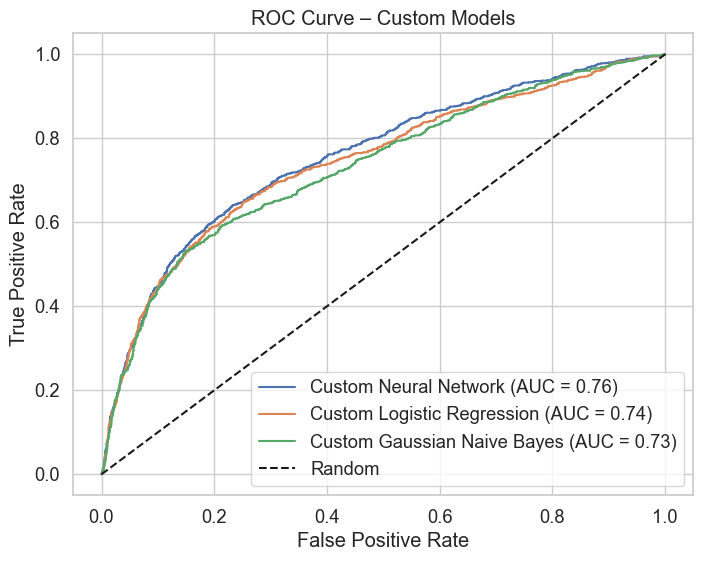

In [101]:
# Custom Models
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in custom_roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Custom Models')
plt.legend()
plt.grid(True)
plt.show()

## ROC Curve Insights
- All models perform significantly well, as shown by their curves clearly above the diagonal.

- The Neural Network consistently outperforms the others across all FPR thresholds, making it the most reliable choice among the custom implementations.

- The curves are close together, which shows your custom implementations are well-constructed and tuned.

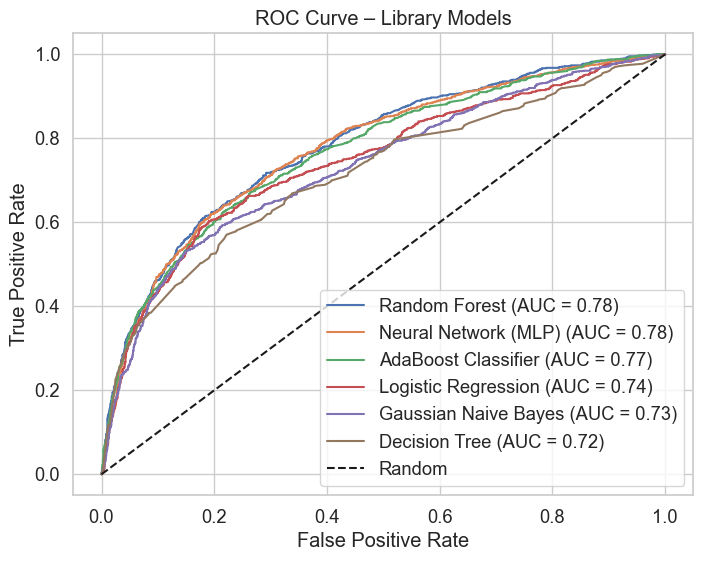

In [102]:
# Library Models
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in library_roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – Library Models')
plt.legend()
plt.grid(True)
plt.show()

## Analyzing all together

Although the custom models did not perfectly match the performance of their library counterparts, the difference was minimal, especially in terms of ROC-AUC and F1-score. This reinforces that:

- Custom implementations were correctly formulated

- They generalized well

- We replicated the algorithm of ML libraries